# Import Modules

In [ ]:
#import basic libraries for functionality
import pandas as pd
import numpy as np

#import statistics, math and vizualization related libraries
import math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#this function helps visualization libraries work
import warnings
warnings.filterwarnings("ignore")

# Bring in Datasets and Merge into Usable DataFrames

## Regulations DataFrame

In [ ]:
#use pandas to read in definitive documentation
DWPP = pd.read_csv('https://raw.githubusercontent.com/TLeahSpencer/DWPP_Analysis/master/DWPP%20CSVs/DWPP_summary_chart.csv')
OSHA = pd.read_csv('https://raw.githubusercontent.com/TLeahSpencer/DWPP_Analysis/master/DWPP%20CSVs/OSHA_statutes.csv')
partners = pd.read_csv('https://raw.githubusercontent.com/TLeahSpencer/DWPP_Analysis/master/DWPP%20CSVs/partner_agencies.csv')

In [ ]:
#check that the data came in correctly for the tables
DWPP.head(2)

,Act_OSHA_Regulation,Days_to_file,Respondents_covered,Days_to_complete,Kick_Out_Provision,Backpay_AllowableRemedy,PreliminaryReinstatement_AllowableRemedy,Compensatory_AllowableRemedy,Punitive_AllowableRemedy,Days_to_Appeal,Venue_to_Appeal,Burden_of_Proof,Statute_Code,Statute
0,Section 11(c) of the Occupational Safety & Hea...,30,"Private sector, US Postal Service, Certain tri...",90,No,Yes,No,Yes,Yes,15,OSHA,But for,OSHA,OSHA
1,Asbestos Hazard Emergency Response Act (AHERA)...,90,"Private sector, State and local government, Ce...",90,No,Yes,No,Yes,Yes,15,OSHA,But for,AHERA,AHERA


In [ ]:
OSHA.head(2)

,Full_Statute,Statute_Title,Statute_Code,Statute
0,29 U.S.C. § 218C,Affordable Care Act (ACA),ACA,ACA
1,15 U.S.C. § 2651,Asbestos Hazard Emergency Response Act (AHERA),AHERA,AHERA


In [ ]:
partners.head(2)

,Whistleblower_Law,Partner_Agency,Statute_Code,Statute
0,Affordable Care Act (ACA),Employee Benefits Security Administration,ACA,ACA
1,Asbestos Hazard Emergency Response Act (AHERA),Environmental Protection Agency,AHERA,AHERA


In [ ]:
#view the columns of the 3 dataframes to merge into new reference_df
print(DWPP.columns)
print(OSHA.columns)
print(partners.columns)

Index(['Act_OSHA_Regulation', 'Days_to_file', 'Respondents_covered',
       'Days_to_complete', 'Kick_Out_Provision', 'Backpay_AllowableRemedy',
       'PreliminaryReinstatement_AllowableRemedy ',
       'Compensatory_AllowableRemedy', 'Punitive_AllowableRemedy',
       'Days_to_Appeal', 'Venue_to_Appeal', 'Burden_of_Proof', 'Statute_Code',
       'Statute'],
      dtype='object')
Index(['Full_Statute', 'Statute_Title', 'Statute_Code', 'Statute'], dtype='object')
Index(['Whistleblower_Law', 'Partner_Agency', 'Statute_Code', 'Statute'], dtype='object')


In [ ]:
#merge the 3 df's in 2 steps
regulations1 =pd.merge(partners, OSHA, 'outer', on=('Statute_Code','Statute'))
regulations1
regulations_df =pd.merge(regulations1, DWPP, 'outer', on=('Statute_Code','Statute'))
#view resulting new df
regulations_df

,Whistleblower_Law,Partner_Agency,Statute_Code,Statute,Full_Statute,Statute_Title,Act_OSHA_Regulation,Days_to_file,Respondents_covered,Days_to_complete,Kick_Out_Provision,Backpay_AllowableRemedy,PreliminaryReinstatement_AllowableRemedy,Compensatory_AllowableRemedy,Punitive_AllowableRemedy,Days_to_Appeal,Venue_to_Appeal,Burden_of_Proof
0,Affordable Care Act (ACA),Employee Benefits Security Administration,ACA,ACA,29 U.S.C. § 218C,Affordable Care Act (ACA),Affordable Care Act (ACA) (2010) 29 U.S.C. § 2...,180,Private and public sector employers,60,210 or within 90 days of OSHA finding,Yes,Yes,Yes,No,30,ALJ,Contributing
1,Asbestos Hazard Emergency Response Act (AHERA),Environmental Protection Agency,AHERA,AHERA,15 U.S.C. § 2651,Asbestos Hazard Emergency Response Act (AHERA),Asbestos Hazard Emergency Response Act (AHERA)...,90,"Private sector, State and local government, Ce...",90,No,Yes,No,Yes,Yes,15,OSHA,But for
2,Clean Air Act (CAA),Environmental Protection Agency,CAA,EPA,42 U.S.C. § 7622,Clean Air Act (CAA),Clean Air Act (CAA) (1977) 42 U.S.C. § 7622 Pr...,30,"Private sector, Federal state and municipal",30,No,Yes,No,Yes,No,30,ALJ,Motivating
3,"Comprehensive Environmental Response, Compensa...",Environmental Protection Agency,CERCLA,EPA,42 U.S.C. § 9610,"Comprehensive Environmental Response, Compensa...","Comprehensive Environmental Response, Compensa...",30,"Private sector, Federal state and municipal",30,No,Yes,No,Yes,No,30,ALJ,Motivating
4,Consumer Financial Protection Act of 2010 (CFPA),Consumer Financial Protection Bureau,CFPA,CFPA,12 U.S.C. § 5567,Consumer Financial Protection Act of 2010 (CFPA),Consumer Financial Protection Act (CFPA) (2010...,180,Any person engaged in offering or providing a ...,60,210 or within 90 days of OSHA finding,Yes,Yes,Yes,No,30,ALJ,Contributing
5,Consumer Product Safety Improvement Act (CPSIA),Consumer Product Safety Commission,CPSIA,CPSIA,15 U.S.C. § 2087,Consumer Product Safety Improvement Act (CPSIA),Consumer Product Safety Improvement Act (CPSIA...,180,"Manufacturing, private labeling, distribution,...",60,210 or within 90 days of OSHA finding,Yes,Yes,Yes,No,30,ALJ,Contributing
6,Energy Reorganization Act (ERA),Nuclear Regulatory Commission\r\n\t\t\tDepartm...,ERA,ERA,42 U.S.C. § 5851,Energy Reorganization Act (ERA),Energy Reorganization Act (ERA) (1974) 42 U.S....,180,The statute provides coverage of NRC contracto...,30,365,Yes,No,Yes,No,30,ALJ,Contributing
7,FDA Food Safety Modernization Act (FSMA),Food & Drug Administration,FSMA,FSMA,21 U.S.C. § 399d,FDA Food Safety Modernization Act (FSMA),FDA Food Safety Modernization Act (FSMA) (2011...,180,"Any entity engaged in the manufacture, process...",60,210 or within 90 days of OSHA finding,Yes,Yes,Yes,No,30,ALJ,Contributing
8,Federal Railroad Safety Act (FRSA),Federal Railroad Administration,FRSA,FRSA,49 U.S.C. § 20109,Federal Railroad Safety Act (FRSA),Federal Railroad Safety Act (FRSA) (2007) 49 U...,180,"Railroad carriers and their contractors, subco...",60,210,Yes,Yes,Yes,Yes 250K cap,30,ALJ,Contributing
9,Federal Water Pollution Control Act (FWPCA),Environmental Protection Agency,FWPCA,EPA,33 U.S.C. § 1367,Federal Water Pollution Control Act (FWPCA),Federal Water Pollution Control Act (FWPCA) (1...,30,"Private sector, State and municipal, Indian tr...",30,No,Yes,No,Yes,No,30,ALJ,Motivating


In [ ]:
#see what types of variables we have to test
regulations_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Whistleblower_Law                          21 non-null     object
 1   Partner_Agency                             21 non-null     object
 2   Statute_Code                               23 non-null     object
 3   Statute                                    23 non-null     object
 4   Full_Statute                               23 non-null     object
 5   Statute_Title                              23 non-null     object
 6   Act_OSHA_Regulation                        23 non-null     object
 7   Days_to_file                               23 non-null     int64 
 8   Respondents_covered                        23 non-null     object
 9   Days_to_complete                           23 non-null     int64 
 10  Kick_Out_Provision                      

In [ ]:
#brief look at the statistics of the variables
regulations_df.describe()

,Days_to_file,Days_to_complete,Days_to_Appeal
count,23.000000,23.000000,23.000000
mean,121.304348,52.173913,29.347826
std,70.343595,18.575772,8.434823
min,30.000000,30.000000,15.000000
25%,30.000000,30.000000,30.000000
50%,180.000000,60.000000,30.000000
75%,180.000000,60.000000,30.000000
max,180.000000,90.000000,60.000000


## Case Summary Dataframe

In [ ]:
#use pandas to read in case summary statistics
received = pd.read_csv('https://raw.githubusercontent.com/TLeahSpencer/DWPP_Analysis/master/DWPP%20CSVs/cases_received.csv')
completed = pd.read_csv('https://raw.githubusercontent.com/TLeahSpencer/DWPP_Analysis/master/DWPP%20CSVs/cases_completed.csv')

In [ ]:
#check that the data came in correctly for the tables
received.head(2)

,Statute,FY2014,FY2015,FY2016,FY2017,FY2018,FY2019
0,ACA,26.0,28.0,34.0,20.0,15.0,13
1,AHERA,3.0,3.0,3.0,5.0,3.0,1


In [ ]:
completed.head(2)

,Statute,FY2014,FY2015,FY2016,FY2017,FY2018,FY2019
0,ACA,25.0,24.0,26.0,31.0,13.0,15
1,AHERA,2.0,3.0,3.0,6.0,5.0,2


In [ ]:
#view the columns of the 2 dataframes to merge into new cases_df
print(received.columns)
print(completed.columns)

Index(['Statute', 'FY2014', 'FY2015', 'FY2016', 'FY2017', 'FY2018', 'FY2019'], dtype='object')
Index(['Statute', 'FY2014', 'FY2015', 'FY2016', 'FY2017', 'FY2018', 'FY2019'], dtype='object')


In [ ]:
#merge the df's
cases_df = pd.merge(received, completed, 'outer', on='Statute', suffixes=('_rec','_com'))
cases_df

,Statute,FY2014_rec,FY2015_rec,FY2016_rec,FY2017_rec,FY2018_rec,FY2019_rec,FY2014_com,FY2015_com,FY2016_com,FY2017_com,FY2018_com,FY2019_com
0,ACA,26.0,28.0,34.0,20.0,15.0,13,25.0,24.0,26.0,31.0,13.0,15
1,AHERA,3.0,3.0,3.0,5.0,3.0,1,2.0,3.0,3.0,6.0,5.0,2
2,AIR21,114.0,116.0,96.0,106.0,88.0,80,95.0,119.0,114.0,109.0,92.0,82
3,CFPA,48.0,43.0,52.0,90.0,45.0,37,34.0,40.0,37.0,89.0,49.0,45
4,CPSIA,7.0,8.0,9.0,12.0,7.0,4,4.0,13.0,6.0,8.0,8.0,5
5,EPA,52.0,59.0,50.0,59.0,54.0,50,56.0,52.0,51.0,70.0,44.0,44
6,ERA,40.0,43.0,45.0,53.0,31.0,25,61.0,41.0,44.0,47.0,43.0,43
7,FRSA,353.0,276.0,302.0,293.0,336.0,215,392.0,369.0,296.0,315.0,316.0,263
8,FSMA,50.0,71.0,66.0,74.0,50.0,67,47.0,47.0,73.0,66.0,60.0,71
9,ISCA,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
#see what types of variables we have to test
cases_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Statute     18 non-null     object 
 1   FY2014_rec  17 non-null     float64
 2   FY2015_rec  17 non-null     float64
 3   FY2016_rec  17 non-null     float64
 4   FY2017_rec  17 non-null     float64
 5   FY2018_rec  17 non-null     float64
 6   FY2019_rec  18 non-null     int64  
 7   FY2014_com  17 non-null     float64
 8   FY2015_com  17 non-null     float64
 9   FY2016_com  17 non-null     float64
 10  FY2017_com  17 non-null     float64
 11  FY2018_com  17 non-null     float64
 12  FY2019_com  18 non-null     int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 2.0+ KB


In [ ]:
#brief look at the statistics of the variables
cases_df.describe()

,FY2014_rec,FY2015_rec,FY2016_rec,FY2017_rec,FY2018_rec,FY2019_rec,FY2014_com,FY2015_com,FY2016_com,FY2017_com,FY2018_com,FY2019_com
count,17.000000,17.000000,17.000000,17.000000,17.000000,18.000000,17.000000,17.000000,17.000000,17.000000,17.000000,18.000000
mean,182.235294,193.411765,197.352941,194.294118,176.882353,171.722222,185.294118,192.529412,194.529412,196.941176,172.000000,171.722222
std,425.057427,485.426238,487.514479,462.568477,448.774008,485.477910,434.546857,470.455513,487.408212,452.031037,417.683044,466.042387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,8.000000,10.000000,12.000000,7.000000,5.500000,7.000000,9.000000,8.000000,8.000000,8.000000,6.500000
50%,40.000000,43.000000,45.000000,53.000000,31.000000,24.500000,34.000000,40.000000,37.000000,47.000000,43.000000,30.000000
75%,114.000000,116.000000,96.000000,106.000000,88.000000,76.750000,95.000000,119.000000,114.000000,109.000000,92.000000,79.250000
max,1750.000000,2026.000000,2030.000000,1932.000000,1870.000000,2084.000000,1794.000000,1951.000000,2035.000000,1876.000000,1740.000000,2001.000000


##Determinations DataFrame

In [ ]:
#use pandas to read in FY determination statistics
FY2014 = pd.read_csv('https://raw.githubusercontent.com/TLeahSpencer/DWPP_Analysis/master/DWPP%20CSVs/FY2014_determinations.csv')
FY2015 = pd.read_csv('https://raw.githubusercontent.com/TLeahSpencer/DWPP_Analysis/master/DWPP%20CSVs/FY2015_determinations.csv')
FY2016 = pd.read_csv('https://raw.githubusercontent.com/TLeahSpencer/DWPP_Analysis/master/DWPP%20CSVs/FY2016_determinations.csv')
FY2017 = pd.read_csv('https://raw.githubusercontent.com/TLeahSpencer/DWPP_Analysis/master/DWPP%20CSVs/FY2017_determinations.csv')
FY2018 = pd.read_csv('https://raw.githubusercontent.com/TLeahSpencer/DWPP_Analysis/master/DWPP%20CSVs/FY2018_determinations.csv')
FY2019 = pd.read_csv('https://raw.githubusercontent.com/TLeahSpencer/DWPP_Analysis/master/DWPP%20CSVs/FY2019_determinations.csv')

In [ ]:
#check that the data came in correctly for the tables
FY2014.head(2)

,Statute,Merit,Settled,Settled_Other,Total_Positive_Outcomes_for_Complainants,Dismissed,Kick_Out,Withdrawn,Total_Determinations,Fiscal_Year
0,ACA,0,0,0,0,13,0,13,26,2014
1,AHERA,0,0,1,1,2,0,0,3,2014


In [ ]:
FY2015.head(2)

,Statute,Merit,Settled,Settled_Other,Total_Positive_Outcomes_for_Complainants,Dismissed,Kick_Out,Withdrawn,Total_Determinations,Fiscal_Year
0,ACA,0,1,1,2,13,0,9,24,2015
1,AHERA,1,0,1,2,1,0,0,3,2015


In [ ]:
FY2016.head(2)

,Statute,Merit,Settled,Settled_Other,Total_Positive_Outcomes_for_Complainants,Dismissed,Kick_Out,Withdrawn,Total_Determinations,Fiscal_Year
0,ACA,0,2,5,7,12,1,6,26,2016
1,AHERA,0,0,0,0,3,0,0,3,2016


In [ ]:
FY2017.head(2)

,Statute,Merit,Settled,Settled_Other,Total_Positive_Outcomes_for_Complainants,Dismissed,Kick_Out,Withdrawn,Total_Determinations,Fiscal_Year
0,ACA,0,1,6,7,15,2,7,31,2017
1,AHERA,0,0,1,1,5,0,0,6,2017


In [ ]:
FY2018.head(2)

,Statute,Merit,Settled,Settled_Other,Total_Positive_Outcomes_for_Complainants,Dismissed,Kick_Out,Withdrawn,Total_Determinations,Fiscal_Year
0,ACA,0,0,2,2,7,0,4,13,2018
1,AHERA,0,0,0,0,3,0,2,5,2018


In [ ]:
FY2019.head(2)

,Statute,Merit,Settled,Settled_Other,Total_Positive_Outcomes_for_Complainants,Dismissed,Kick_Out,Withdrawn,Total_Determinations,Fiscal_Year
0,ACA,0,0,1,1,13,0,1,15,2019
1,AHERA,0,1,1,2,0,0,0,2,2019


In [ ]:
#view the columns of the 6 dataframes to merge into new determinations_df
print(FY2014.columns)
print(FY2015.columns)
print(FY2016.columns)
print(FY2017.columns)
print(FY2018.columns)
print(FY2019.columns)

Index(['Statute', 'Merit', 'Settled', 'Settled_Other',
       'Total_Positive_Outcomes_for_Complainants', 'Dismissed', 'Kick_Out',
       'Withdrawn', 'Total_Determinations', 'Fiscal_Year'],
      dtype='object')
Index(['Statute', 'Merit', 'Settled', 'Settled_Other',
       'Total_Positive_Outcomes_for_Complainants', 'Dismissed', 'Kick_Out',
       'Withdrawn', 'Total_Determinations', 'Fiscal_Year'],
      dtype='object')
Index(['Statute', 'Merit', 'Settled', 'Settled_Other',
       'Total_Positive_Outcomes_for_Complainants', 'Dismissed', 'Kick_Out',
       'Withdrawn', 'Total_Determinations', 'Fiscal_Year'],
      dtype='object')
Index(['Statute', 'Merit', 'Settled', 'Settled_Other',
       'Total_Positive_Outcomes_for_Complainants', 'Dismissed', 'Kick_Out',
       'Withdrawn', 'Total_Determinations', 'Fiscal_Year'],
      dtype='object')
Index(['Statute', 'Merit', 'Settled', 'Settled_Other',
       'Total_Positive_Outcomes_for_Complainants', 'Dismissed', 'Kick_Out',
       'Withdrawn

In [ ]:
#create variable name for dataframes to be merged into one
all_years = [FY2014, FY2015, FY2016, FY2017, FY2017, FY2018, FY2019]

In [ ]:
#merge dataframe
determinations_df = pd.concat(all_years)

In [ ]:
#view resulting table
determinations_df

,Statute,Merit,Settled,Settled_Other,Total_Positive_Outcomes_for_Complainants,Dismissed,Kick_Out,Withdrawn,Total_Determinations,Fiscal_Year
0,ACA,0,0,0,0,13,0,13,26,2014
1,AHERA,0,0,1,1,2,0,0,3,2014
2,AIR21,0,10,11,21,49,0,28,98,2014
3,CFPA,1,3,4,8,15,1,10,34,2014
4,CPSIA,0,3,0,3,1,1,0,5,2014
...,...,...,...,...,...,...,...,...,...,...
13,PSIA,1,0,0,1,5,0,0,6,2019
14,SOX,1,6,15,22,92,15,19,148,2019
15,SPA,0,1,3,4,5,0,1,10,2019
16,STAA,2,29,31,62,222,12,40,336,2019


In [ ]:
#see what types of variables we have to test
determinations_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 17
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Statute                                   120 non-null    object
 1   Merit                                     120 non-null    int64 
 2   Settled                                   120 non-null    int64 
 3   Settled_Other                             120 non-null    int64 
 4   Total_Positive_Outcomes_for_Complainants  120 non-null    int64 
 5   Dismissed                                 120 non-null    int64 
 6   Kick_Out                                  120 non-null    int64 
 7   Withdrawn                                 120 non-null    int64 
 8   Total_Determinations                      120 non-null    int64 
 9   Fiscal_Year                               120 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 10.3+ KB


In [ ]:
#view list of columns in determinations_df
determinations_df.columns

Index(['Statute', 'Merit', 'Settled', 'Settled_Other',
       'Total_Positive_Outcomes_for_Complainants', 'Dismissed', 'Kick_Out',
       'Withdrawn', 'Total_Determinations', 'Fiscal_Year'],
      dtype='object')

In [ ]:
#brief look at the statistics of the variables
determinations_df.describe()

,Merit,Settled,Settled_Other,Total_Positive_Outcomes_for_Complainants,Dismissed,Kick_Out,Withdrawn,Total_Determinations,Fiscal_Year
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,2.833333,23.841667,21.000000,47.675000,98.675000,5.025000,40.050000,191.425000,2016.591667
std,5.420678,72.663377,49.876486,125.437866,223.482489,10.805743,104.996587,452.751581,1.606164
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000
25%,0.000000,0.000000,1.000000,1.750000,5.000000,0.000000,1.000000,8.000000,2015.000000
50%,1.000000,2.000000,4.500000,9.000000,18.000000,0.000000,6.500000,41.500000,2017.000000
75%,2.000000,6.000000,13.250000,22.250000,74.000000,3.000000,19.250000,115.000000,2018.000000
max,29.000000,361.000000,273.000000,581.000000,1067.000000,56.000000,502.000000,2096.000000,2019.000000


# Explore the Datasets






##Add Columns to total negative outcomes for complainants, plus to represent percentages of negative and positive outcomes per statute per year.

In [ ]:
#add column to total negative outcomes for complainants
determinations_df = determinations_df.assign(Total_Negative_Outcomes_for_Complainants = determinations_df['Dismissed'] + determinations_df['Kick_Out'] + determinations_df['Withdrawn'])
determinations_df.head(2)

,Statute,Merit,Settled,Settled_Other,Total_Positive_Outcomes_for_Complainants,Dismissed,Kick_Out,Withdrawn,Total_Determinations,Fiscal_Year,Total_Negative_Outcomes_for_Complainants
0,ACA,0,0,0,0,13,0,13,26,2014,26
1,AHERA,0,0,1,1,2,0,0,3,2014,2


In [ ]:
#add columns to determinations of percentages of outcomes
determinations_df = determinations_df.assign(Pos_Outcome_Perc = determinations_df['Total_Positive_Outcomes_for_Complainants'] / determinations_df['Total_Determinations'])
determinations_df.head(2)

,Statute,Merit,Settled,Settled_Other,Total_Positive_Outcomes_for_Complainants,Dismissed,Kick_Out,Withdrawn,Total_Determinations,Fiscal_Year,Total_Negative_Outcomes_for_Complainants,Pos_Outcome_Perc
0,ACA,0,0,0,0,13,0,13,26,2014,26,0.000000
1,AHERA,0,0,1,1,2,0,0,3,2014,2,0.333333


In [ ]:
determinations_df = determinations_df.assign(Neg_Outcome_Perc = determinations_df['Total_Negative_Outcomes_for_Complainants'] / determinations_df['Total_Determinations'])
determinations_df.head(2)

,Statute,Merit,Settled,Settled_Other,Total_Positive_Outcomes_for_Complainants,Dismissed,Kick_Out,Withdrawn,Total_Determinations,Fiscal_Year,Total_Negative_Outcomes_for_Complainants,Pos_Outcome_Perc,Neg_Outcome_Perc
0,ACA,0,0,0,0,13,0,13,26,2014,26,0.000000,1.000000
1,AHERA,0,0,1,1,2,0,0,3,2014,2,0.333333,0.666667


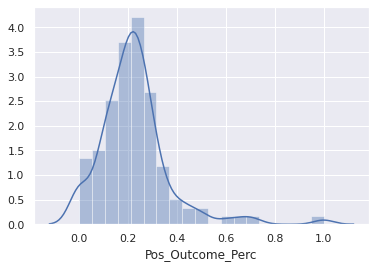

In [ ]:
#view new percentage of outcomes distributions with histogram distribution mapping
sns.distplot(determinations_df['Pos_Outcome_Perc'])

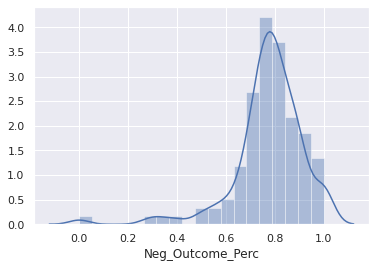

In [ ]:
sns.distplot(determinations_df['Neg_Outcome_Perc'])

##Below we are looking at the distribution of variables in the Determinations dataframe.

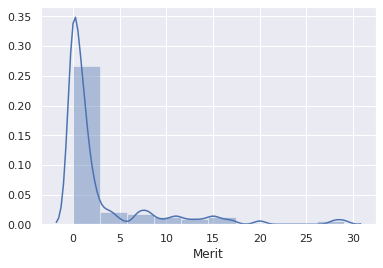

In [ ]:
#make histograms and to plot the distribution of the variables in determinations
sns.distplot(determinations_df['Merit'], bins=10)

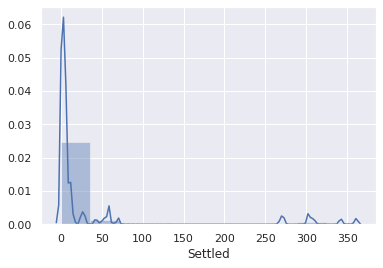

In [ ]:
sns.distplot(determinations_df['Settled'], bins=10)


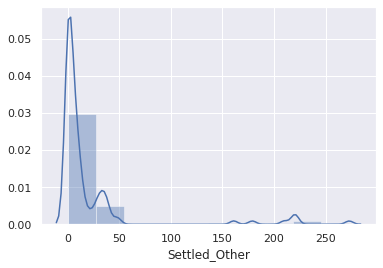

In [ ]:
sns.distplot(determinations_df['Settled_Other'], bins=10)


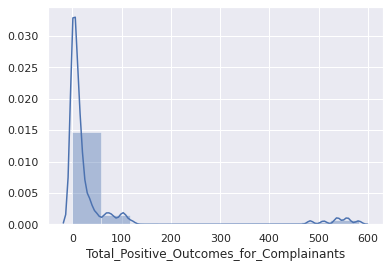

In [ ]:
sns.distplot(determinations_df['Total_Positive_Outcomes_for_Complainants'], bins=10)

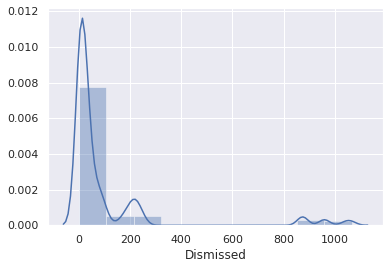

In [ ]:
sns.distplot(determinations_df['Dismissed'], bins=10)

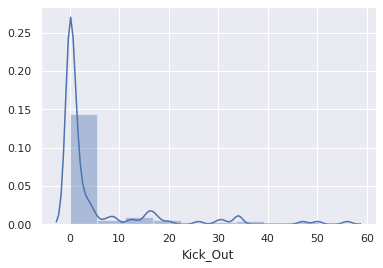

In [ ]:
sns.distplot(determinations_df['Kick_Out'], bins=10)

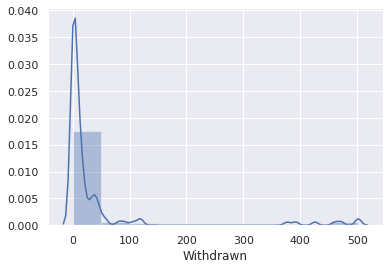

In [ ]:
sns.distplot(determinations_df['Withdrawn'], bins=10)

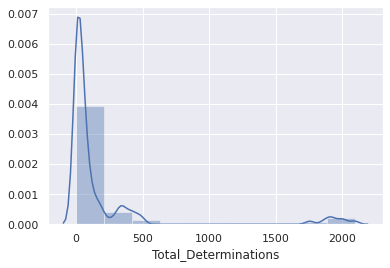

In [ ]:
sns.distplot(determinations_df['Total_Determinations'], bins=10)

In [ ]:
#separate OSHA outlier to see if t tests are possible with normal distributions in any other variables
#also remove any statutes that have less than 40 total determinations per year
no_OSHA_over40 = (determinations_df['Statute'] != 'OSHA') & (determinations_df['Total_Determinations'] > 40)
no_OSHA_over40.value_counts()

False    67
True     53
dtype: int64

In [ ]:
#create new dataframe with the new parameters defined above
mid_dets = determinations_df.iloc[no_OSHA_over40.values]
mid_dets.head(2)

,Statute,Merit,Settled,Settled_Other,Total_Positive_Outcomes_for_Complainants,Dismissed,Kick_Out,Withdrawn,Total_Determinations,Fiscal_Year,Total_Negative_Outcomes_for_Complainants,Pos_Outcome_Perc,Neg_Outcome_Perc
2,AIR21,0,10,11,21,49,0,28,98,2014,77,0.214286,0.785714
5,EPA,2,3,7,12,39,0,7,58,2014,46,0.206897,0.793103


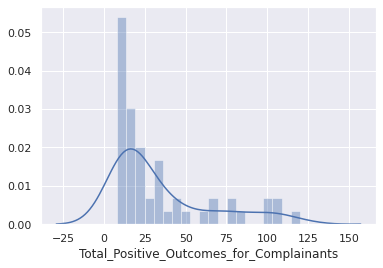

In [ ]:
sns.distplot(mid_dets['Total_Positive_Outcomes_for_Complainants'], bins=20)

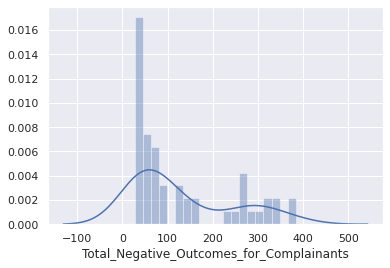

In [ ]:
#view the distribution of variables without the outliers or those with very few cases per year
sns.distplot(mid_dets['Total_Negative_Outcomes_for_Complainants'], bins=20)

##None of the variables are evenly distributed enough for t tests, even with taking out the top outlier OSHA and the statutes with less than 40 outcomes per year. 
##I will show the differences between the outcomes (if any) under different party presidents by comparing them with in pivot tables below.

##Set of variable groups:
##Years under a Democratic President 2014-2016
##Years under a Republican President 2017-2019

In [ ]:
#create 2 groups based on political party of president for that year: Democratic 2014-2016, Republican 2017-2019
dem_yrs = (determinations_df['Fiscal_Year'] <= 2016)
rep_yrs = (determinations_df['Fiscal_Year'] >= 2017)
dem_det = determinations_df.iloc[dem_yrs.values]
rep_det = determinations_df.iloc[rep_yrs.values]

In [ ]:
#insert column with party name of president
dem_det = dem_det.assign(Presidential_Party='Democratic')
#view the new group
dem_det.head(2)

,Statute,Merit,Settled,Settled_Other,Total_Positive_Outcomes_for_Complainants,Dismissed,Kick_Out,Withdrawn,Total_Determinations,Fiscal_Year,Total_Negative_Outcomes_for_Complainants,Pos_Outcome_Perc,Neg_Outcome_Perc,Presidential_Party
0,ACA,0,0,0,0,13,0,13,26,2014,26,0.000000,1.000000,Democratic
1,AHERA,0,0,1,1,2,0,0,3,2014,2,0.333333,0.666667,Democratic


In [ ]:
#insert column with party name of president
rep_det = rep_det.assign(Presidential_Party='Republican')
#insert column with party name of president
rep_det.head(2)

,Statute,Merit,Settled,Settled_Other,Total_Positive_Outcomes_for_Complainants,Dismissed,Kick_Out,Withdrawn,Total_Determinations,Fiscal_Year,Total_Negative_Outcomes_for_Complainants,Pos_Outcome_Perc,Neg_Outcome_Perc,Presidential_Party
0,ACA,0,1,6,7,15,2,7,31,2017,24,0.225806,0.774194,Republican
1,AHERA,0,0,1,1,5,0,0,6,2017,5,0.166667,0.833333,Republican


In [ ]:
#rejoin both parties in one table
both_parties_det = dem_det.append(rep_det)
both_parties_det

,Statute,Merit,Settled,Settled_Other,Total_Positive_Outcomes_for_Complainants,Dismissed,Kick_Out,Withdrawn,Total_Determinations,Fiscal_Year,Total_Negative_Outcomes_for_Complainants,Pos_Outcome_Perc,Neg_Outcome_Perc,Presidential_Party
0,ACA,0,0,0,0,13,0,13,26,2014,26,0.000000,1.000000,Democratic
1,AHERA,0,0,1,1,2,0,0,3,2014,2,0.333333,0.666667,Democratic
2,AIR21,0,10,11,21,49,0,28,98,2014,77,0.214286,0.785714,Democratic
3,CFPA,1,3,4,8,15,1,10,34,2014,26,0.235294,0.764706,Democratic
4,CPSIA,0,3,0,3,1,1,0,5,2014,2,0.600000,0.400000,Democratic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,PSIA,1,0,0,1,5,0,0,6,2019,5,0.166667,0.833333,Republican
14,SOX,1,6,15,22,92,15,19,148,2019,126,0.148649,0.851351,Republican
15,SPA,0,1,3,4,5,0,1,10,2019,6,0.400000,0.600000,Republican
16,STAA,2,29,31,62,222,12,40,336,2019,274,0.184524,0.815476,Republican


In [ ]:
#break into smaller Statute groups for bar charts (to be used later in iterations)
#leave of TFA with only one year and ISCA with no cases
statutes = both_parties_det['Statute']
first4 = both_parties_det[both_parties_det['Statute'].isin(['ACA', 'AHERA', 'AIR21', 'CFPA'])]
second4 = both_parties_det[both_parties_det['Statute'].isin(['CSPIA', 'EPA', 'ERA', 'FRSA'])]
third4 = both_parties_det[both_parties_det['Statute'].isin(['FMSA', 'MAP21', 'NTSSA', 'OSHA'])]
fourth4 = both_parties_det[both_parties_det['Statute'].isin(['PSIA', 'SOX', 'SPA', 'STAA'])]
first4.head()

,Statute,Merit,Settled,Settled_Other,Total_Positive_Outcomes_for_Complainants,Dismissed,Kick_Out,Withdrawn,Total_Determinations,Fiscal_Year,Total_Negative_Outcomes_for_Complainants,Pos_Outcome_Perc,Neg_Outcome_Perc,Presidential_Party
0,ACA,0,0,0,0,13,0,13,26,2014,26,0.000000,1.000000,Democratic
1,AHERA,0,0,1,1,2,0,0,3,2014,2,0.333333,0.666667,Democratic
2,AIR21,0,10,11,21,49,0,28,98,2014,77,0.214286,0.785714,Democratic
3,CFPA,1,3,4,8,15,1,10,34,2014,26,0.235294,0.764706,Democratic
0,ACA,0,1,1,2,13,0,9,24,2015,22,0.083333,0.916667,Democratic


##Create pivot tables to view summaries by statute for both new variable groups and the determinations group as a whole.

In [ ]:
#create pivot table determinations under the Democratic Presidential Years of 2014 - 2016
dem_summary_by_statute = pd.pivot_table(dem_det, values=['Total_Positive_Outcomes_for_Complainants', 'Total_Negative_Outcomes_for_Complainants', 'Total_Determinations', 'Pos_Outcome_Perc', 'Neg_Outcome_Perc'], index='Statute', aggfunc={'Total_Positive_Outcomes_for_Complainants': np.sum, 'Total_Negative_Outcomes_for_Complainants': np.sum, 'Total_Determinations': np.sum, 'Pos_Outcome_Perc': np.mean, 'Neg_Outcome_Perc': np.mean})
dem_summary_by_statute

,Neg_Outcome_Perc,Pos_Outcome_Perc,Total_Determinations,Total_Negative_Outcomes_for_Complainants,Total_Positive_Outcomes_for_Complainants
Statute,,,,,
ACA,0.882479,0.117521,76,67,9
AHERA,0.666667,0.333333,9,6,3
AIR21,0.759672,0.240328,340,258,82
CFPA,0.739812,0.260188,111,82,29
CPSIA,0.774359,0.225641,24,20,4
EPA,0.721315,0.278685,166,120,46
ERA,0.729441,0.270559,153,112,41
FRSA,0.806673,0.193327,1088,875,213
FSMA,0.744513,0.255487,170,124,46


In [ ]:
#create pivot table determinations under the Democratic Presidential Years of 2014 - 2016
rep_summary_by_statute = pd.pivot_table(rep_det, values=['Total_Positive_Outcomes_for_Complainants', 'Total_Negative_Outcomes_for_Complainants', 'Total_Determinations', 'Pos_Outcome_Perc', 'Neg_Outcome_Perc'], index='Statute', aggfunc={'Total_Positive_Outcomes_for_Complainants': np.sum, 'Total_Negative_Outcomes_for_Complainants': np.sum, 'Total_Determinations': np.sum, 'Pos_Outcome_Perc': np.mean, 'Neg_Outcome_Perc': np.mean})
rep_summary_by_statute

,Neg_Outcome_Perc,Pos_Outcome_Perc,Total_Determinations,Total_Negative_Outcomes_for_Complainants,Total_Positive_Outcomes_for_Complainants
Statute,,,,,
ACA,0.831969,0.168031,90,73,17
AHERA,0.666667,0.333333,19,15,4
AIR21,0.810771,0.189229,413,335,78
CFPA,0.825687,0.174313,277,233,44
CPSIA,0.837500,0.162500,29,25,4
EPA,0.829983,0.170017,230,193,37
ERA,0.725227,0.274773,188,137,51
FRSA,0.841560,0.158440,1271,1066,205
FSMA,0.771659,0.228341,270,209,61


In [ ]:
#create pivot table determinations under the Democratic Presidential Years of 2014 - 2016
all_summary_by_statute = pd.pivot_table(determinations_df, values=['Total_Positive_Outcomes_for_Complainants', 'Total_Negative_Outcomes_for_Complainants', 'Total_Determinations', 'Pos_Outcome_Perc', 'Neg_Outcome_Perc'], index='Statute', aggfunc={'Total_Positive_Outcomes_for_Complainants': np.sum, 'Total_Negative_Outcomes_for_Complainants': np.sum, 'Total_Determinations': np.sum, 'Pos_Outcome_Perc': np.mean, 'Neg_Outcome_Perc': np.mean})
all_summary_by_statute

,Neg_Outcome_Perc,Pos_Outcome_Perc,Total_Determinations,Total_Negative_Outcomes_for_Complainants,Total_Positive_Outcomes_for_Complainants
Statute,,,,,
ACA,0.853616,0.146384,166,140,26
AHERA,0.666667,0.333333,28,21,7
AIR21,0.788871,0.211129,753,593,160
CFPA,0.788884,0.211116,388,315,73
CPSIA,0.810440,0.189560,53,45,8
EPA,0.783411,0.216589,396,313,83
ERA,0.727033,0.272967,341,249,92
FRSA,0.826608,0.173392,2359,1941,418
FSMA,0.760025,0.239975,440,333,107


##View the outcome of percentage comparisons represented in decimal for (0.10 = 10%) for Outcome of Years under Democratic and Republican presidents.

In [ ]:
#drop all columns except percentages
dem_perc = dem_summary_by_statute.drop(columns=['Total_Determinations',
       'Total_Negative_Outcomes_for_Complainants',
       'Total_Positive_Outcomes_for_Complainants'])
rep_perc = rep_summary_by_statute.drop(columns=['Total_Determinations',
       'Total_Negative_Outcomes_for_Complainants',
       'Total_Positive_Outcomes_for_Complainants'])
#join the 2 percentange df's
party_perc = pd.merge(dem_perc, rep_perc, 'inner', suffixes=('_DEM', '_REP'), on='Statute')
party_perc

,Neg_Outcome_Perc_DEM,Pos_Outcome_Perc_DEM,Neg_Outcome_Perc_REP,Pos_Outcome_Perc_REP
Statute,,,,
ACA,0.882479,0.117521,0.831969,0.168031
AHERA,0.666667,0.333333,0.666667,0.333333
AIR21,0.759672,0.240328,0.810771,0.189229
CFPA,0.739812,0.260188,0.825687,0.174313
CPSIA,0.774359,0.225641,0.837500,0.162500
EPA,0.721315,0.278685,0.829983,0.170017
ERA,0.729441,0.270559,0.725227,0.274773
FRSA,0.806673,0.193327,0.841560,0.158440
FSMA,0.744513,0.255487,0.771659,0.228341


In [ ]:
#pull a list of columns for full tables
dem_det.columns

Index(['Statute', 'Merit', 'Settled', 'Settled_Other',
       'Total_Positive_Outcomes_for_Complainants', 'Dismissed', 'Kick_Out',
       'Withdrawn', 'Total_Determinations', 'Fiscal_Year',
       'Total_Negative_Outcomes_for_Complainants', 'Pos_Outcome_Perc',
       'Neg_Outcome_Perc', 'Presidential_Party'],
      dtype='object')

In [ ]:
#merge the unpivoted percentages
dem_full_perc = dem_det.drop(columns=['Merit', 'Settled', 'Settled_Other',
       'Total_Positive_Outcomes_for_Complainants', 'Dismissed', 'Kick_Out',
       'Withdrawn', 'Total_Determinations', 'Fiscal_Year',
       'Total_Negative_Outcomes_for_Complainants'])
rep_full_perc = rep_det.drop(columns=['Merit', 'Settled', 'Settled_Other',
       'Total_Positive_Outcomes_for_Complainants', 'Dismissed', 'Kick_Out',
       'Withdrawn', 'Total_Determinations', 'Fiscal_Year',
       'Total_Negative_Outcomes_for_Complainants'])

In [ ]:
all_party_perc = dem_full_perc.append(rep_full_perc)
all_party_perc

,Statute,Pos_Outcome_Perc,Neg_Outcome_Perc,Presidential_Party
0,ACA,0.000000,1.000000,Democratic
1,AHERA,0.333333,0.666667,Democratic
2,AIR21,0.214286,0.785714,Democratic
3,CFPA,0.235294,0.764706,Democratic
4,CPSIA,0.600000,0.400000,Democratic
...,...,...,...,...
13,PSIA,0.166667,0.833333,Republican
14,SOX,0.148649,0.851351,Republican
15,SPA,0.400000,0.600000,Republican
16,STAA,0.184524,0.815476,Republican


##The following information is for use with Iterations.

In [ ]:
#print list of statutes
all_party_perc['Statute'].unique()

array(['ACA', 'AHERA', 'AIR21', 'CFPA', 'CPSIA', 'EPA', 'ERA', 'FRSA',
       'FSMA', 'ISCA', 'MAP21', 'NTSSA', 'OSHA', 'PSIA', 'SOX', 'SPA',
       'STAA', 'TFA'], dtype=object)

In [ ]:
#get list of unique statutes
determinations_df.Statute.unique()

array(['ACA', 'AHERA', 'AIR21', 'CFPA', 'CPSIA', 'EPA', 'ERA', 'FRSA',
       'FSMA', 'ISCA', 'MAP21', 'NTSSA', 'OSHA', 'PSIA', 'SOX', 'SPA',
       'STAA', 'TFA'], dtype=object)

In [ ]:
#define new dataframes by individual statutes
ACA = determinations_df[determinations_df['Statute'].isin(['ACA'])]
ACA

,Statute,Merit,Settled,Settled_Other,Total_Positive_Outcomes_for_Complainants,Dismissed,Kick_Out,Withdrawn,Total_Determinations,Fiscal_Year,Total_Negative_Outcomes_for_Complainants,Pos_Outcome_Perc,Neg_Outcome_Perc
0,ACA,0,0,0,0,13,0,13,26,2014,26,0.000000,1.000000
0,ACA,0,1,1,2,13,0,9,24,2015,22,0.083333,0.916667
0,ACA,0,2,5,7,12,1,6,26,2016,19,0.269231,0.730769
0,ACA,0,1,6,7,15,2,7,31,2017,24,0.225806,0.774194
0,ACA,0,1,6,7,15,2,7,31,2017,24,0.225806,0.774194
0,ACA,0,0,2,2,7,0,4,13,2018,11,0.153846,0.846154
0,ACA,0,0,1,1,13,0,1,15,2019,14,0.066667,0.933333


In [ ]:
#create new dataframes to look at variable independently in bar charts (iteration)


In [ ]:
ACA_settled_perc = sum(ACA['Settled']) / sum(ACA['Total_Determinations'])
ACA_settled_perc

0.030120481927710843

In [ ]:
#define function make an independent dataframe for each statute and average percentages for positive and negative outcomes
#def isol_var(dataframe, statute, column)

In [ ]:
#drop Fiscal_Year to create modified FY dataframes
mFY2014 =FY2014.drop(columns=['Fiscal_Year'])
mFY2015 =FY2015.drop(columns=['Fiscal_Year'])
mFY2016 =FY2016.drop(columns=['Fiscal_Year'])
mFY2017 =FY2017.drop(columns=['Fiscal_Year'])
mFY2018 =FY2018.drop(columns=['Fiscal_Year'])
mFY2019 =FY2019.drop(columns=['Fiscal_Year'])

In [ ]:
#create variable name for modified dataframes to be merged into one
all_6_myears =  [mFY2014, mFY2015, mFY2016, mFY2017, mFY2017, mFY2018, mFY2019]

In [ ]:
#merge modified dataframe
mdeterminations_df = pd.concat(all_6_myears)
#view the end result
mdeterminations_df

,Statute,Merit,Settled,Settled_Other,Total_Positive_Outcomes_for_Complainants,Dismissed,Kick_Out,Withdrawn,Total_Determinations
0,ACA,0,0,0,0,13,0,13,26
1,AHERA,0,0,1,1,2,0,0,3
2,AIR21,0,10,11,21,49,0,28,98
3,CFPA,1,3,4,8,15,1,10,34
4,CPSIA,0,3,0,3,1,1,0,5
...,...,...,...,...,...,...,...,...,...
13,PSIA,1,0,0,1,5,0,0,6
14,SOX,1,6,15,22,92,15,19,148
15,SPA,0,1,3,4,5,0,1,10
16,STAA,2,29,31,62,222,12,40,336


In [ ]:
#isolate variables to analyze and perform calculations on
statute =mdeterminations_df['Statute']
merit = mdeterminations_df['Merit']
settled = mdeterminations_df['Settled']
settled_oth = mdeterminations_df['Settled_Other']
tot_pos = mdeterminations_df['Total_Positive_Outcomes_for_Complainants']
dimiss = mdeterminations_df['Dismissed']
kickout = mdeterminations_df['Kick_Out']
withdrawn = mdeterminations_df['Withdrawn']
tot_det = mdeterminations_df['Total_Determinations']

In [ ]:
print(statute, merit)

0       ACA
1     AHERA
2     AIR21
3      CFPA
4     CPSIA
      ...  
13     PSIA
14      SOX
15      SPA
16     STAA
17      TFA
Name: Statute, Length: 120, dtype: object 0     0
1     0
2     0
3     1
4     0
     ..
13    1
14    1
15    0
16    2
17    0
Name: Merit, Length: 120, dtype: int64


In [ ]:
#View how many times merit was awarded per statute per year
merit.value_counts()

0     54
1     29
2     10
3      3
4      3
7      3
8      3
15     2
11     2
9      1
5      1
29     1
28     1
12     1
13     1
14     1
16     1
17     1
20     1
10     1
Name: Merit, dtype: int64

##In the cell above, you notice 54 of the 120 rows have 0 listed for merits. That is nearly half of all statutes in all years related NO merits at all.
##29 times, 1 was awarded for the entire statute, over 6 years.
##The odds of getting more than 1 merit in per year in a statute are 37 in 120 or just under 30%.

In [ ]:
#More items for iteration and portfolio
#group cases and determinations by Whistleblower Laws, partnering agencies, regulation requirements (e.g., days to:file, complete, appeal; allowable remedies; provisions; burden of proof; appeal venue) 
#Other factors to be consider are a) CAA, CERCLA, FWPCA, SDWA, SWDA, TSCA statutes are all reported in the summary outcomes under EPA 
#and b) TFA statute is only reported for FY2019
#Finally, the Statutes themselves will be ranked by percentage of positive and negative outcomes

##Check for correlations to test with pairplots

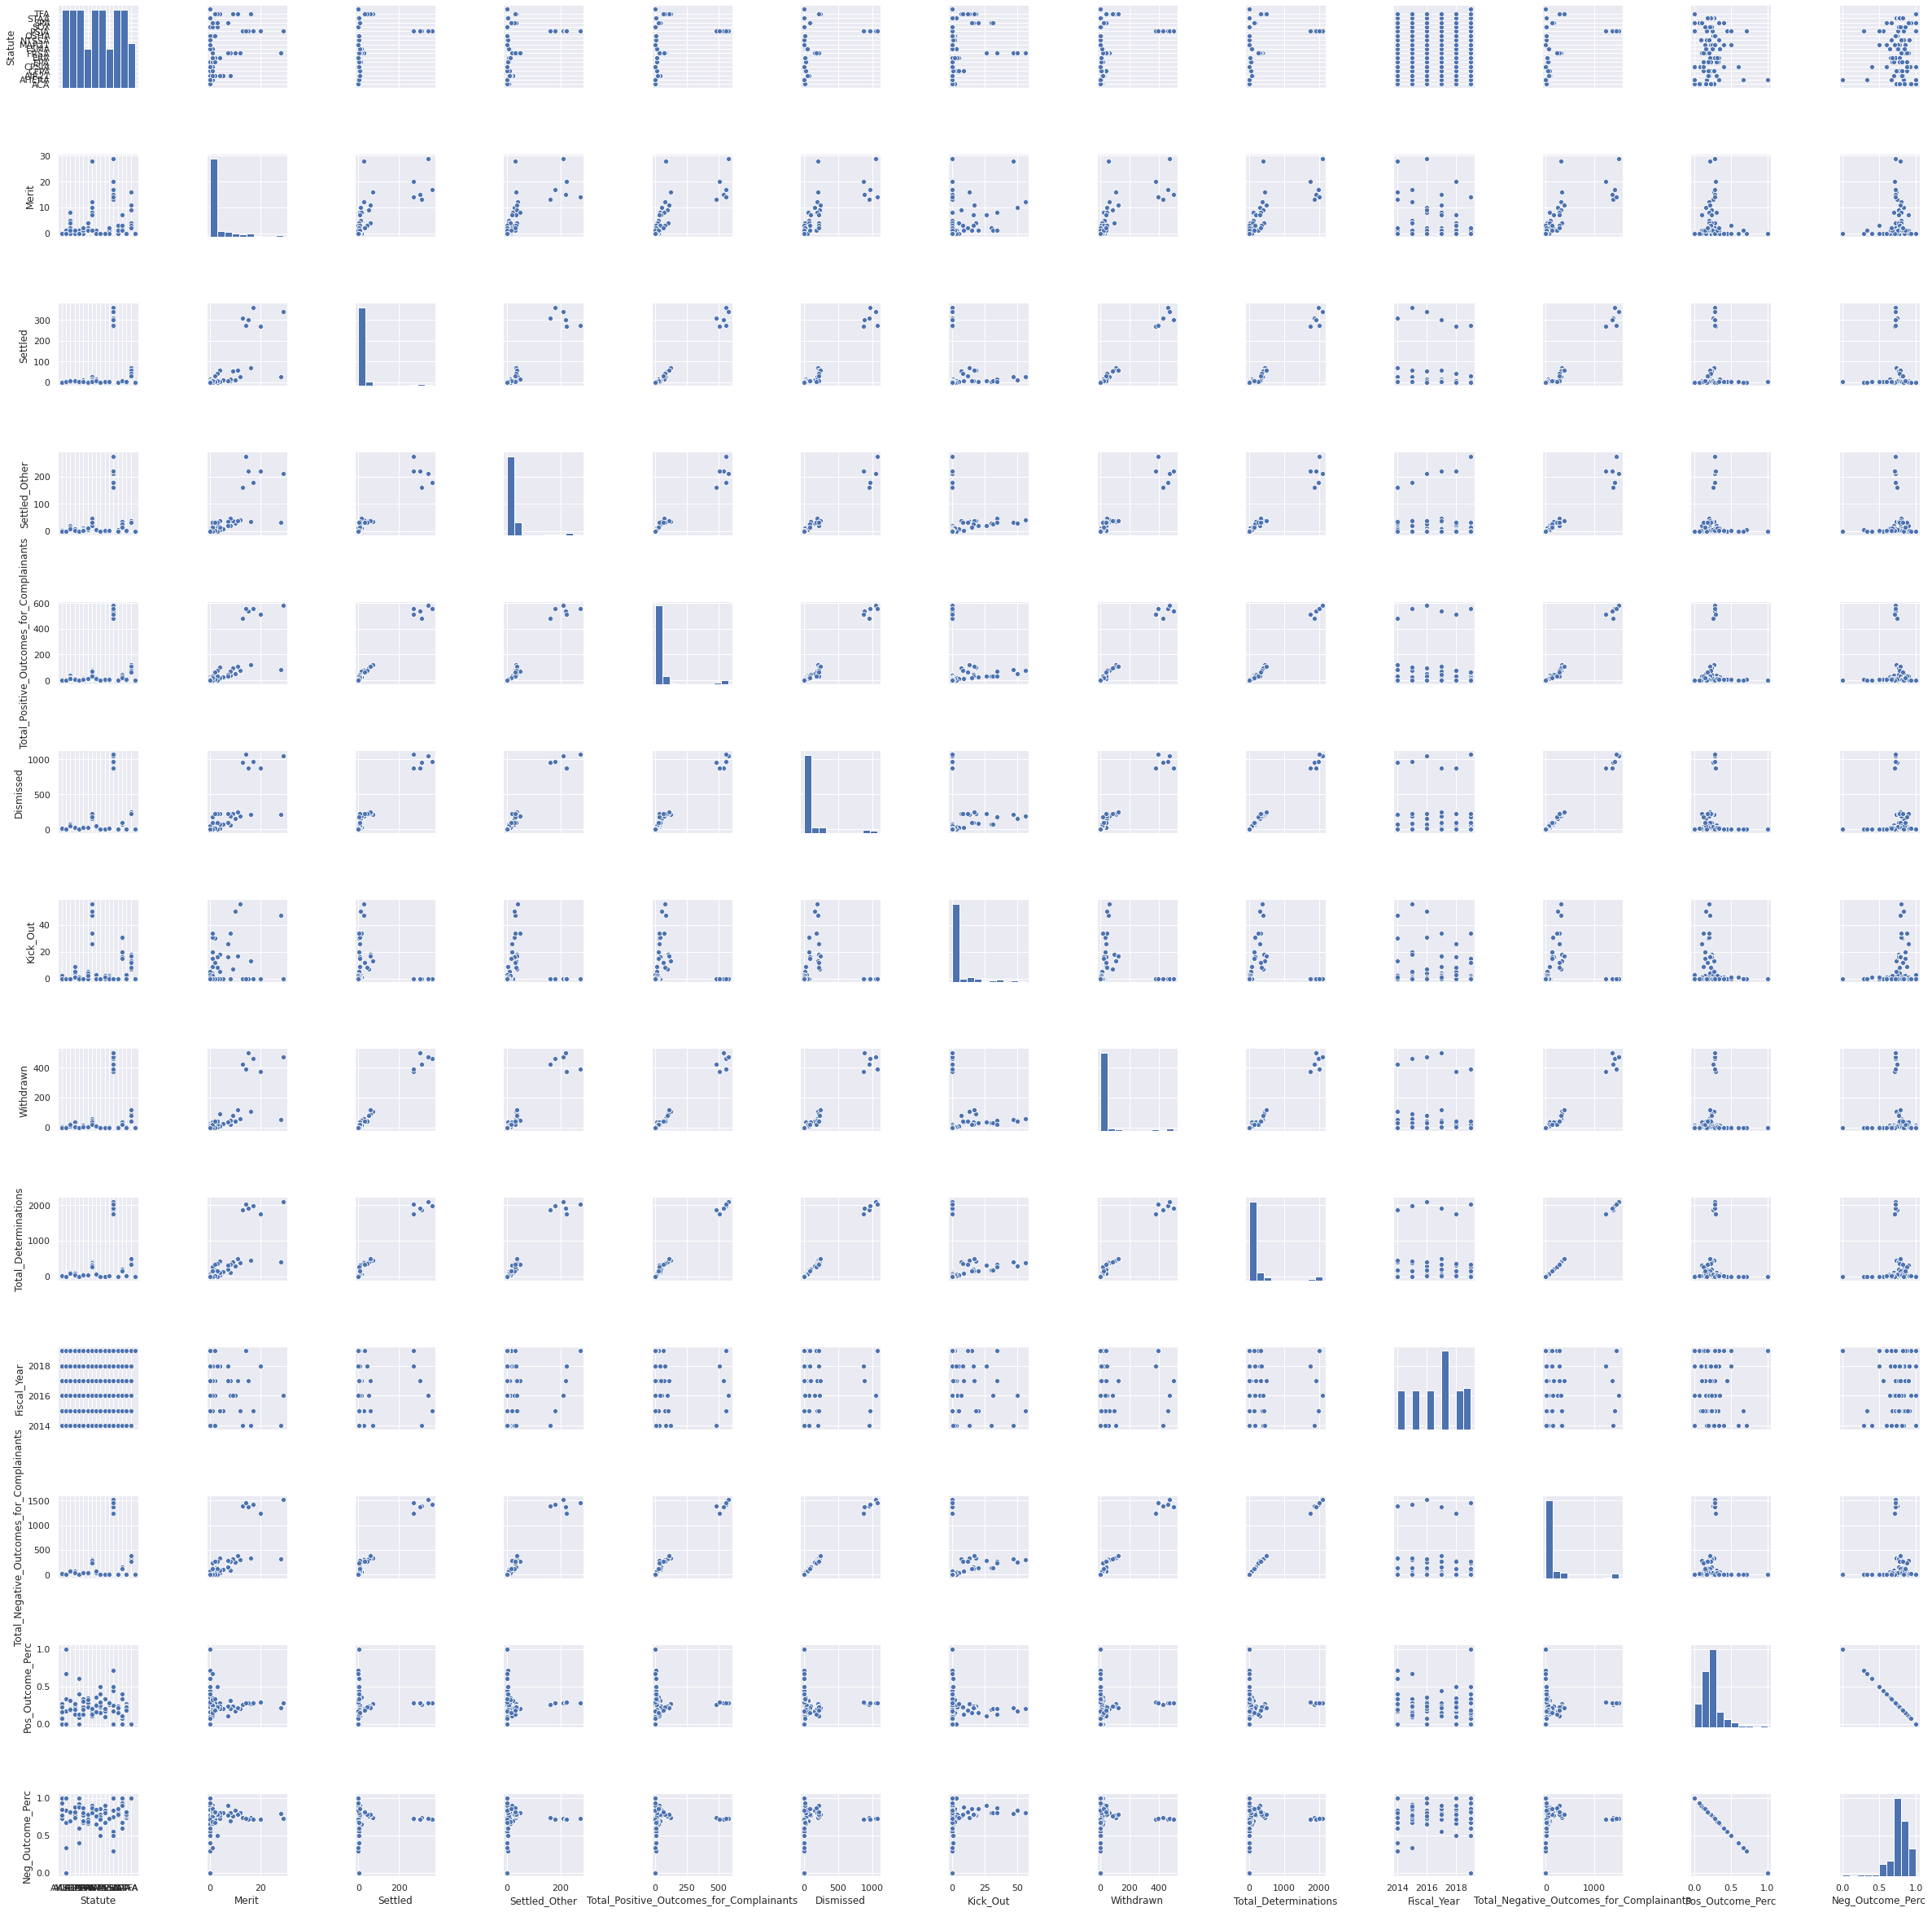

In [ ]:
#make pairplot to show correlations of variables in determinations and including overal look by statute 
sns.pairplot(determinations_df, vars =['Statute', 'Merit', 'Settled', 'Settled_Other',
       'Total_Positive_Outcomes_for_Complainants', 'Dismissed', 'Kick_Out',
       'Withdrawn', 'Total_Determinations', 'Fiscal_Year',
       'Total_Negative_Outcomes_for_Complainants', 'Pos_Outcome_Perc',
       'Neg_Outcome_Perc'], dropna=True)

##As you can see above, there are a lot of variables to compare in the determinations dataframe. Below I am going to break these down a couple of different ways.
##One thing we can deduct from this bird's eye view, is that none of our variables are normally distributed. This is viewable in the diagonal histograms, where only categorical variables and percentages are anywhere near normal distribution. T testing will be out of the question here.

In [ ]:
#break the statutes into groups that have over 100 cases per year and those that have under 100 
over100d = determinations_df['Statute'].isin(['FRSA', 'STAA', 'OSHA', 'SOX', 'AIR21'])
#determinations_df[determinations_df.Statute.isin(['ACA'])]
over100d.head()


0    False
1    False
2     True
3    False
4    False
Name: Statute, dtype: bool

In [ ]:
under100d = over100 = determinations_df['Statute'].isin(['ACA', 'AHERA', 'CFPA', 'EPA', 'ERA', 'FSMA', 'ISCA', 'MAP21', 'NTSSA', 'PSIA', 'SPA', 'TFA'])
under100d.head()

0     True
1     True
2    False
3     True
4    False
Name: Statute, dtype: bool

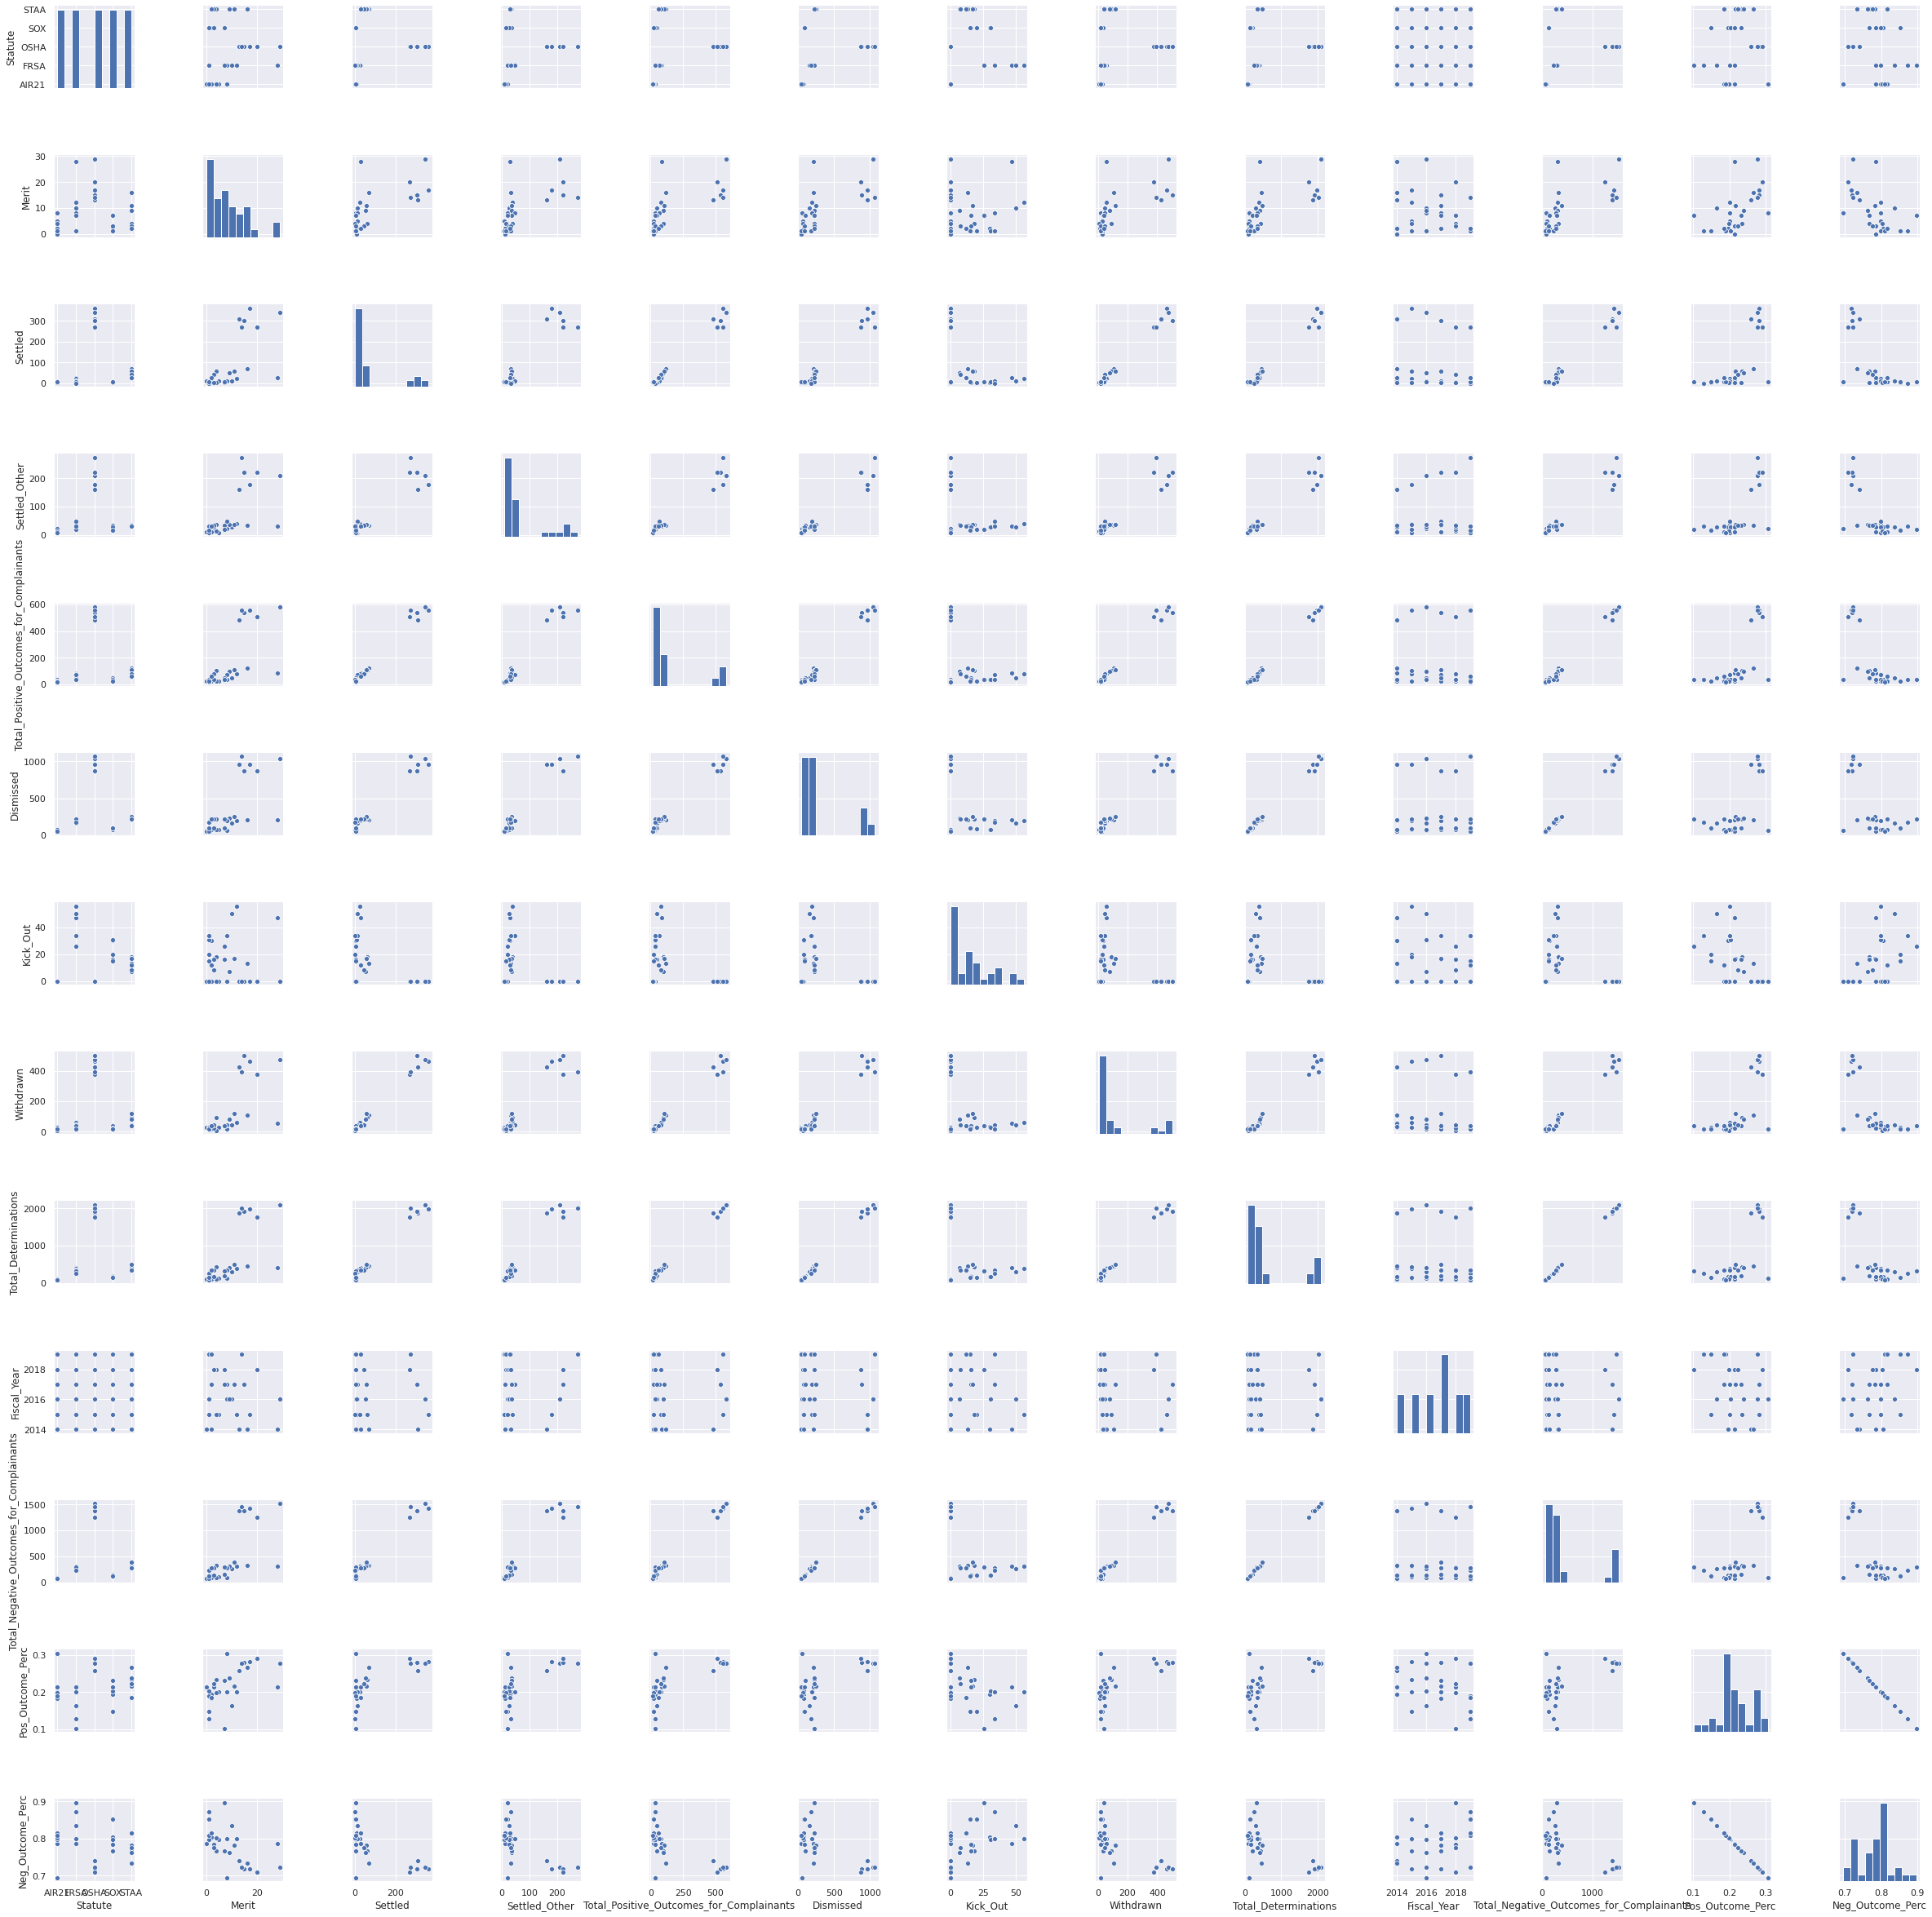

In [ ]:
#make pairplot to show correlations of variables in determinations and including overal look by statute with cases per year over 100
sns.pairplot(determinations_df[over100d], vars =['Statute', 'Merit', 'Settled', 'Settled_Other',
       'Total_Positive_Outcomes_for_Complainants', 'Dismissed', 'Kick_Out',
       'Withdrawn', 'Total_Determinations', 'Fiscal_Year',
       'Total_Negative_Outcomes_for_Complainants', 'Pos_Outcome_Perc',
       'Neg_Outcome_Perc'], dropna=True)

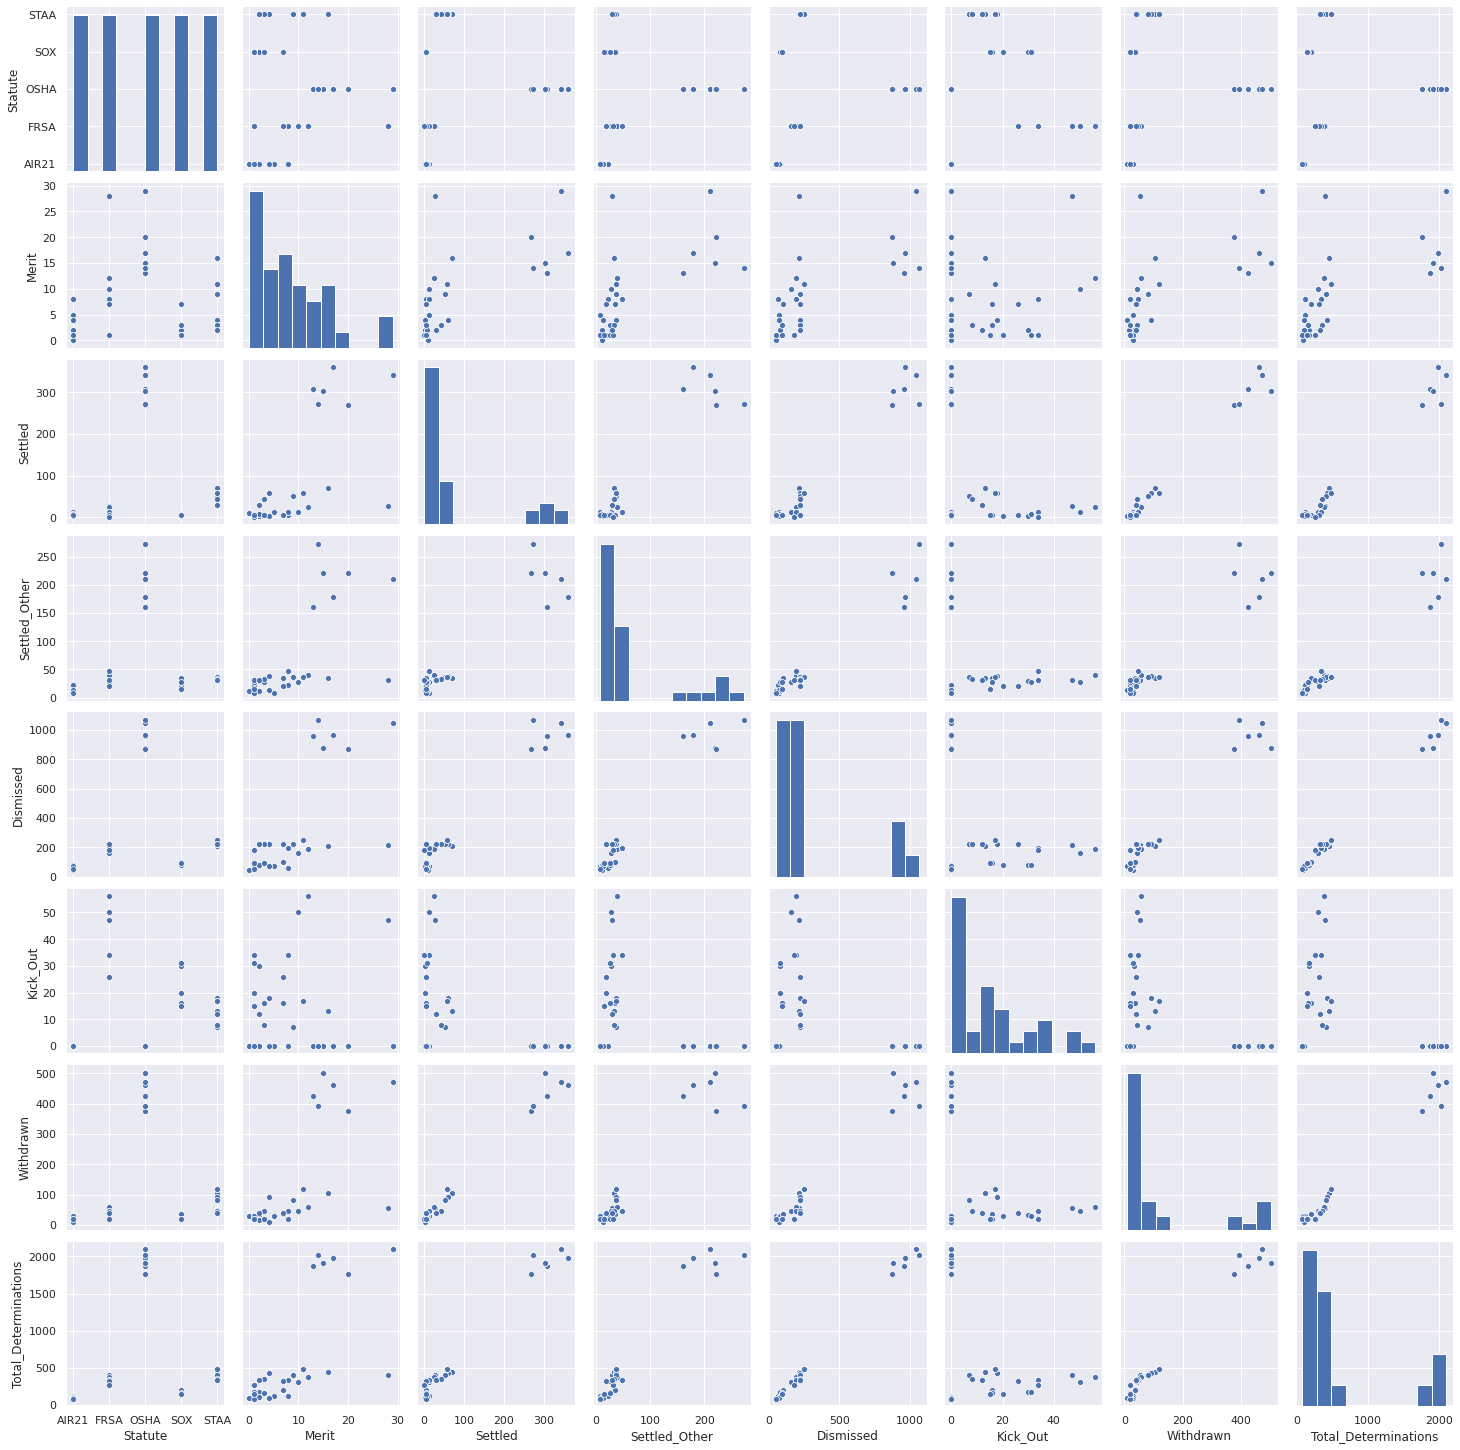

In [ ]:
#make pairplot to show correlations of variables in determinations and including overal look by statute with cases per year over 100, and remove the summary variables 
sns.pairplot(determinations_df[over100d], vars =['Statute', 'Merit', 'Settled', 'Settled_Other', 'Dismissed', 'Kick_Out',
       'Withdrawn', 'Total_Determinations'], dropna=True)

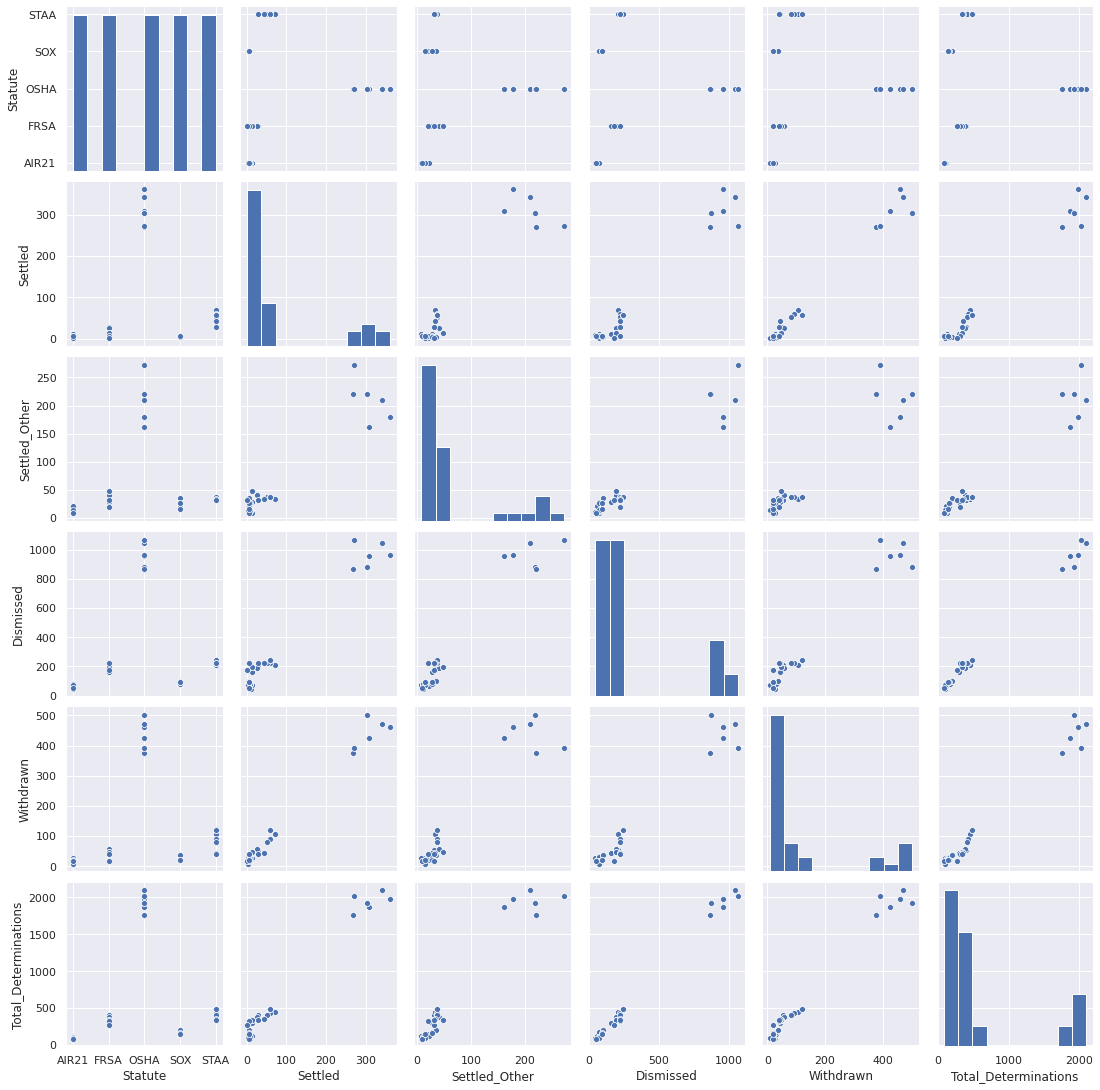

In [ ]:
#make pairplot to show correlations of variables in determinations and including overal look by statute with cases per year over 100, looking at those from chart above with some correlation 
sns.pairplot(determinations_df[over100d], vars =['Statute', 'Settled', 'Settled_Other', 'Dismissed',
       'Withdrawn', 'Total_Determinations'], dropna=True)

##All four of these outcomes for statutes with over 100 cases per year (settled, settled_other, dismissed, withdrawn)appear to have correllation to total_distributions. We will test each for statistically significant correlation in the next Section: Analyzing the Dataset.

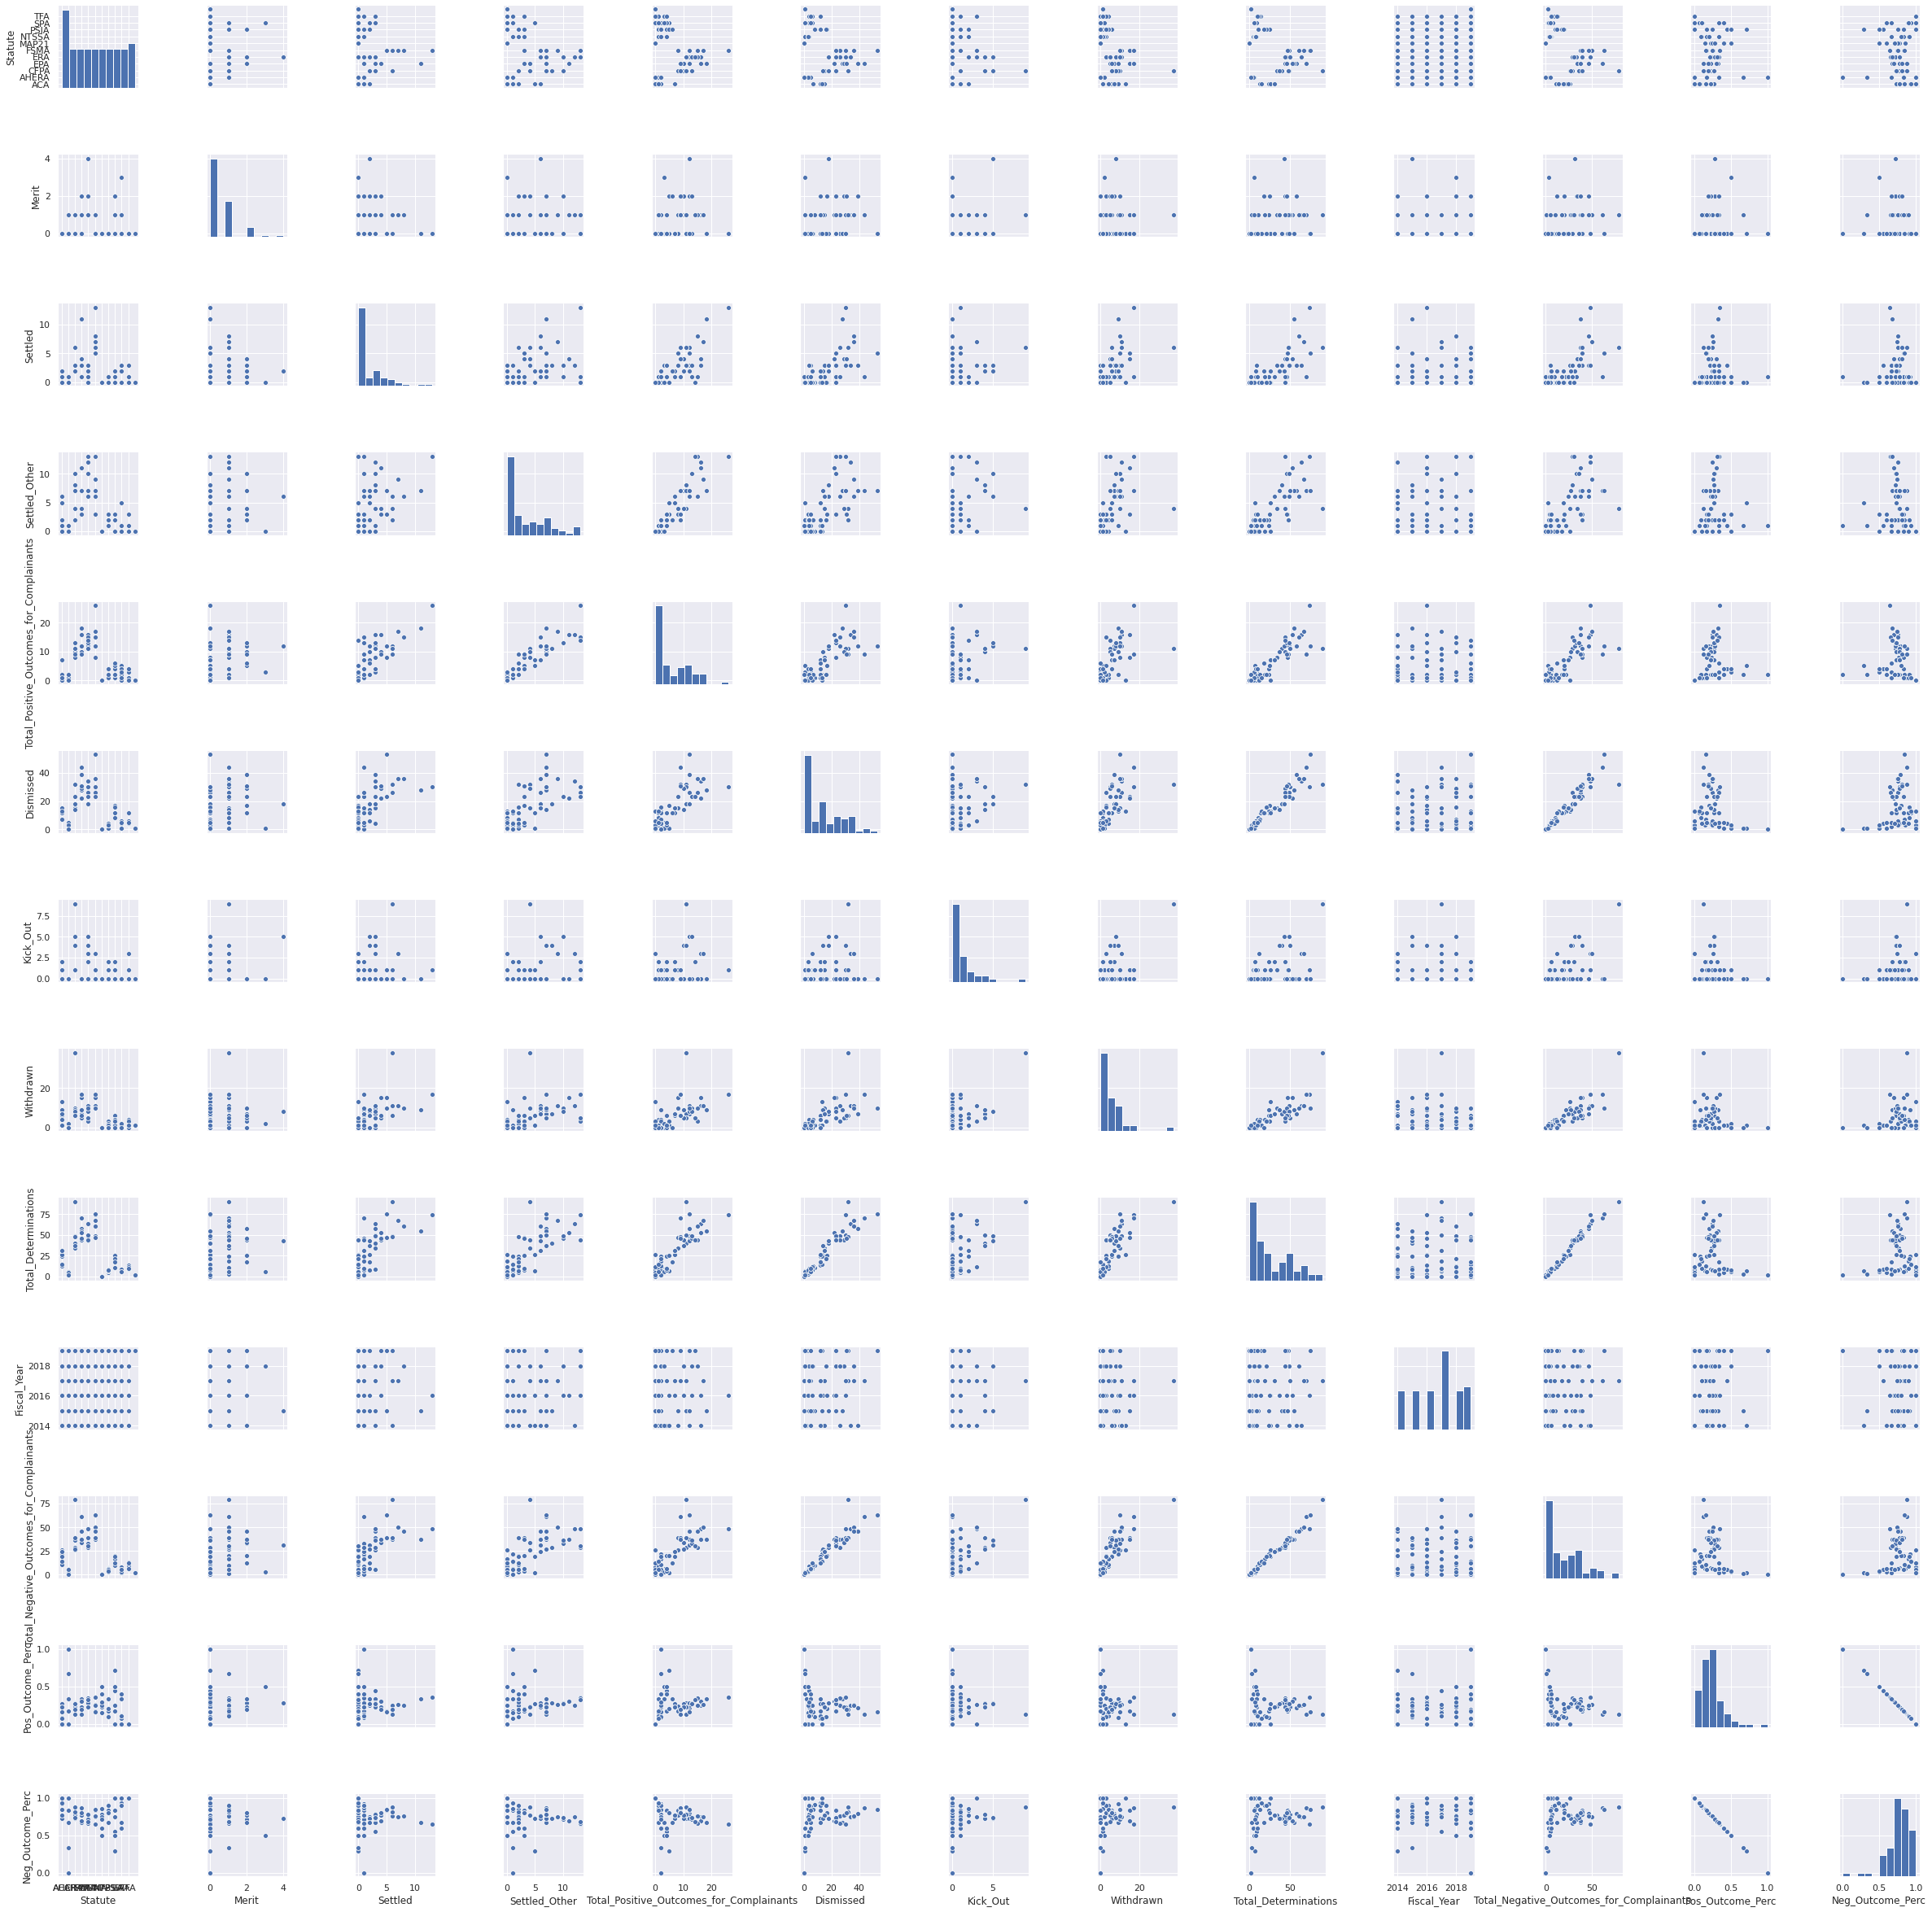

In [ ]:
#make pairplot to show correlations of variables in determinations and including overal look by statute with cases per year under 100 
sns.pairplot(determinations_df[under100d], vars =['Statute', 'Merit', 'Settled', 'Settled_Other',
       'Total_Positive_Outcomes_for_Complainants', 'Dismissed', 'Kick_Out',
       'Withdrawn', 'Total_Determinations', 'Fiscal_Year',
       'Total_Negative_Outcomes_for_Complainants', 'Pos_Outcome_Perc',
       'Neg_Outcome_Perc'], dropna=True)

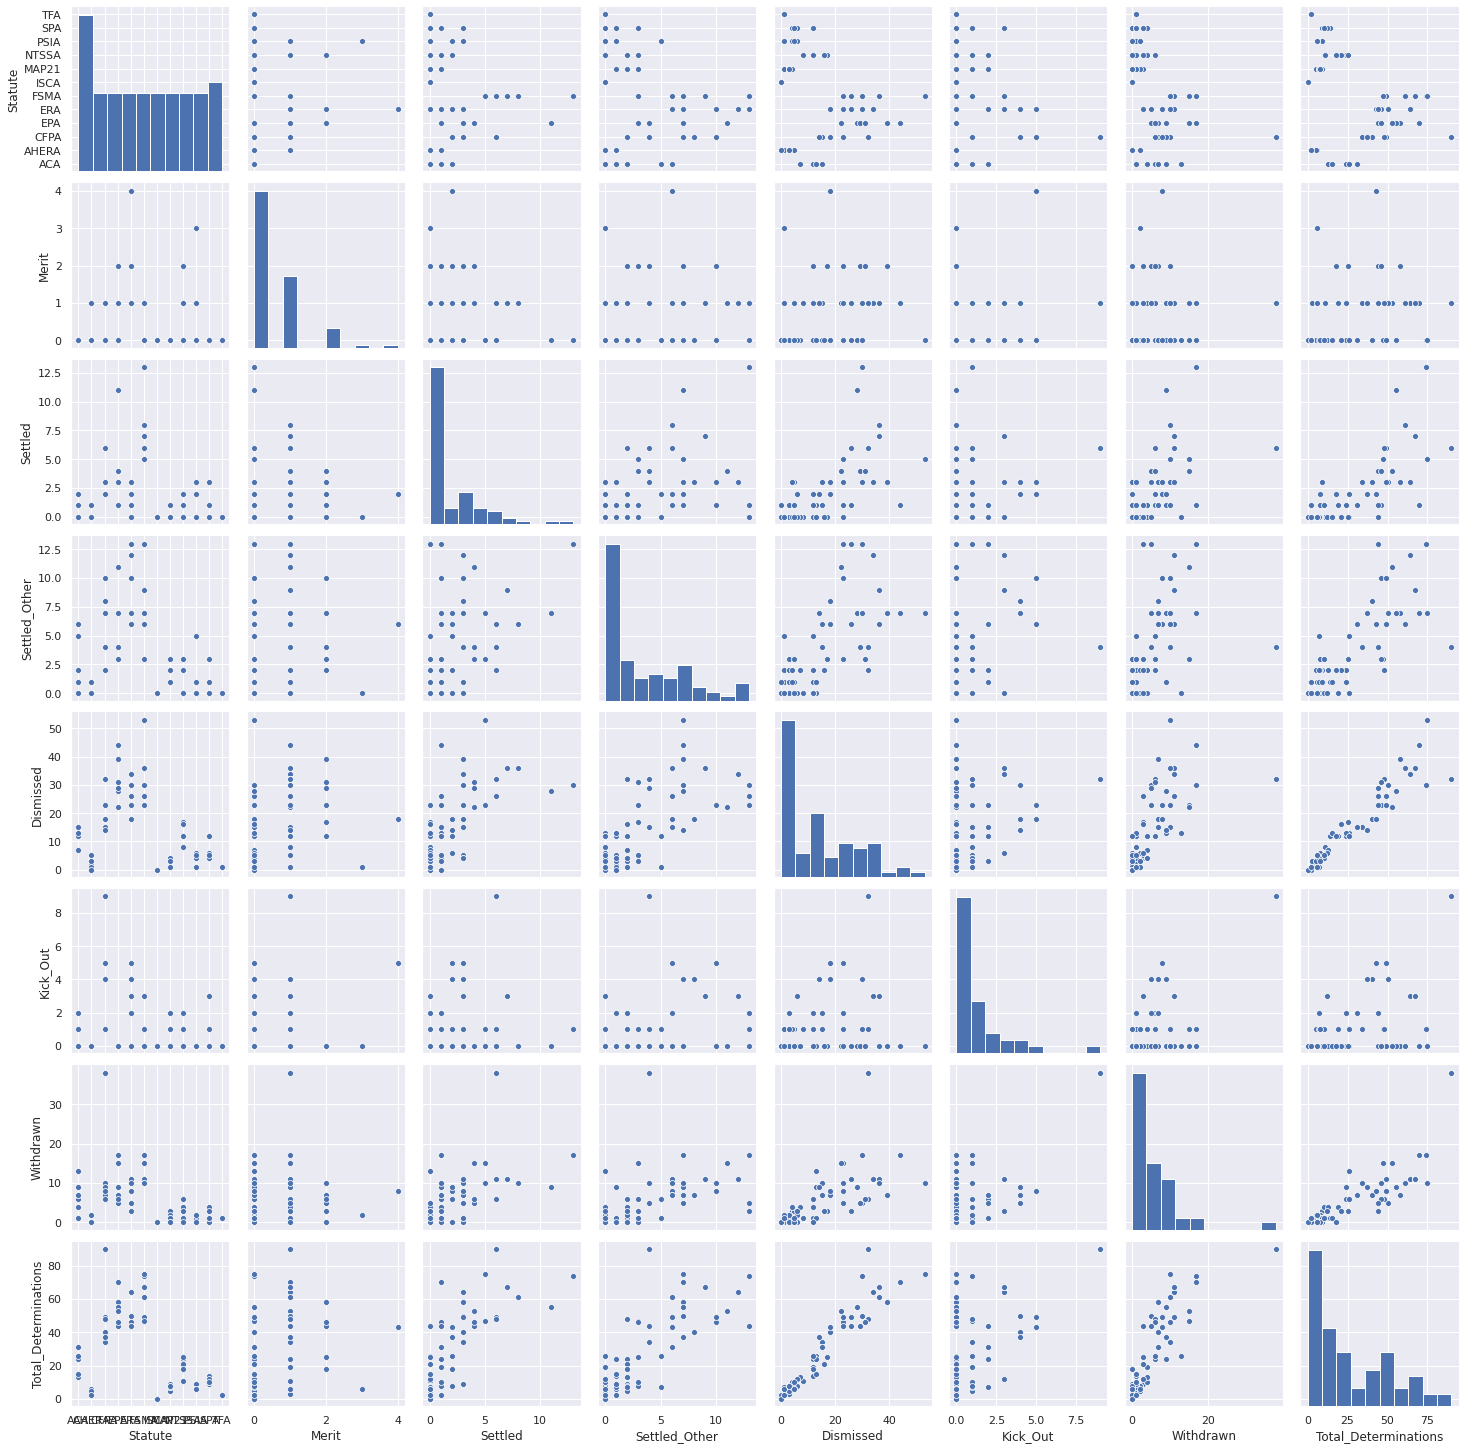

In [ ]:
#make pairplot to show correlations of variables in determinations and including overal look by statute with cases per year under 100, looking at those bove with some correlation 
sns.pairplot(determinations_df[under100d], vars =['Statute', 'Merit', 'Settled', 'Settled_Other', 'Dismissed', 'Kick_Out',
       'Withdrawn', 'Total_Determinations'], dropna=True)

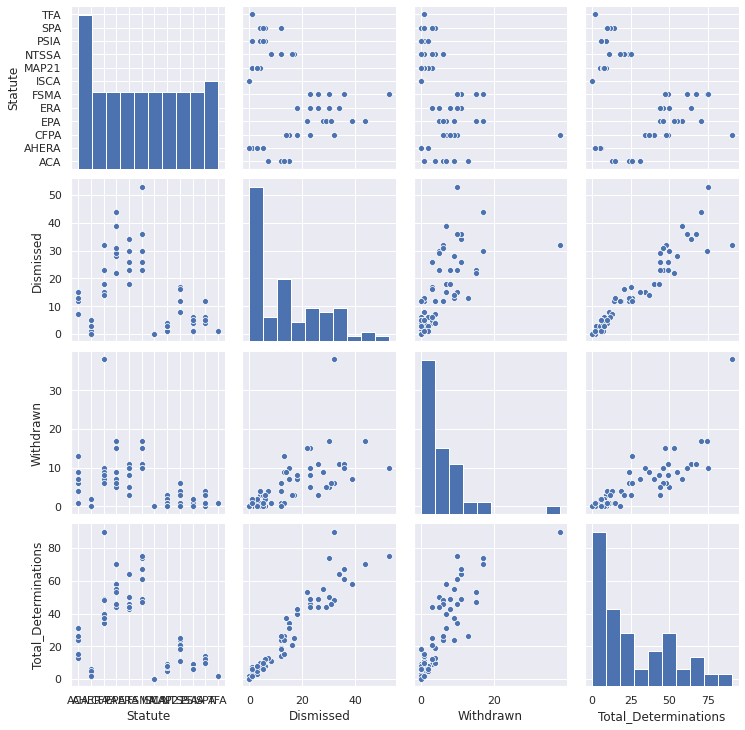

In [ ]:
#narrow down futher to the categories that show clear correlation in the scatterplots above
sns.pairplot(determinations_df[under100d], vars =['Statute', 'Dismissed',
       'Withdrawn', 'Total_Determinations'], dropna=True)

##For the statutes under 100 determinations per year, it is clear the only visible correlations are dismissed and withdrawn to total determinations and to each other (at a lesser degree).
##We will test below in the Analyze the Data Section with pearson r correlation test for significant correlation.




#Analyze the Datasets

##Test for correlation in the outcomes.

##Postive Outcomes for Complainants to Total Determinations

In [ ]:
#test for correlation
stats.pearsonr(determinations_df['Total_Determinations'], determinations_df['Merit'])

(0.8042242130543068, 1.9618532173773797e-28)

There is statistical evidence for a correlation between Total_Determinations and Merit, with a p-value<0.005.
Correlation coefficient of r=0.804, a high positive correlation.

In [ ]:
#test for correlation
stats.pearsonr(determinations_df['Total_Determinations'], determinations_df['Settled'])

(0.9855336607536437, 8.076414439764088e-93)

There is statistical evidence for a correlation between Total_Determinations and Settled, with a p-value<0.005.
Correlation coefficient of r=0.986, a very high positive correlation.

In [ ]:
#test for correlation
stats.pearsonr(determinations_df['Total_Determinations'], determinations_df['Settled_Other'])

(0.9825826158729454, 4.2385736135116776e-88)

There is statistical evidence for a correlation between Total_Determinations and Settled_Other, with a p-value<0.005.
Correlation coefficient of r=0.983, a very high positive correlation.

##Negative Outcomes for Complainants to Total Determinations

In [ ]:
#test for correlation
stats.pearsonr(determinations_df['Total_Determinations'], determinations_df['Dismissed'])

(0.9973051810776185, 9.855945330904405e-136)

There is statistical evidence for a correlation between Total_Determinations and Dismissed, with a p-value<0.005.
Correlation coefficient of r=0.997, a very high positive correlation.

In [ ]:
#test for correlation
stats.pearsonr(determinations_df['Total_Determinations'], determinations_df['Kick_Out'])

(0.08547053286773028, 0.35331282447931833)

There is not statistical evidence for a correlation between Total_Determinations and Kick_Out, with a p-value<0.35.
Correlation coefficient of r=0.086, a very low positive correlation.
However, according to our p-value, the correlation is not statistically significant.

In [ ]:
#test for correlation
stats.pearsonr(determinations_df['Total_Determinations'], determinations_df['Withdrawn'])

(0.9902069702257387, 9.29789883264528e-103)

There is statistical evidence for a correlation between Total_Determinations and Withcrawn, with a p-value<0.005. Correlation coefficient of r=0.990, a very high positive correlation.

##Positive Outcomes to Negative Outcomes

In [ ]:
#test for correlation
stats.pearsonr(determinations_df['Merit'], determinations_df['Dismissed'])

(0.8064281430767184, 1.0782010502639893e-28)

There is statistical evidence for a correlation between Merit and Dismissed, with a p-value<0.005. Correlation coefficient of r=0.806, a high positive correlation.

In [ ]:
#test for correlation
stats.pearsonr(determinations_df['Merit'], determinations_df['Kick_Out'])

(0.3974686999221883, 6.953784372984532e-06)

There is statistical evidence for a correlation between Merit and Kick_Out, with a p-value<0.005. Correlation coefficient of r=0.397, a low positive correlation.

In [ ]:
#test for correlation
stats.pearsonr(determinations_df['Merit'], determinations_df['Withdrawn'])

(0.772385030865282, 5.18328884118065e-25)

There is statistical evidence for a correlation between Merit and Withdrawn, with a p-value<0.005. Correlation coefficient of r=0.772, a high positive correlation.

In [ ]:
#test for correlation
stats.pearsonr(determinations_df['Settled'], determinations_df['Dismissed'])

(0.9764301838062339, 2.001169335850637e-80)

There is statistical evidence for a correlation between Settled and Dismissed, with a p-value<0.005. Correlation coefficient of r=0.976, a very high positive correlation.

In [ ]:
#test for correlation
stats.pearsonr(determinations_df['Settled'], determinations_df['Kick_Out'])

(-0.043682280250556635, 0.6356902809470834)

There is not statistical evidence for a correlation between Total_Determinations and Dismissed, with a p-value<0.636. Correlation coefficient of r=-0.044, a low negative correlation. However, according to our p-value, the correlation is not statistically significant.

In [ ]:
#test for correlation
stats.pearsonr(determinations_df['Settled'], determinations_df['Withdrawn'])

(0.9908498378837799, 1.724146870710466e-104)

There is statistical evidence for a correlation between Settled and Withdrawn, with a p-value<0.005. Correlation coefficient of r=0.991, a very high positive correlation.

In [ ]:
#test for correlation
stats.pearsonr(determinations_df['Settled_Other'], determinations_df['Dismissed'])

(0.9797607807845442, 2.7503613141999835e-84)

There is statistical evidence for a correlation between Settled_Other and Dismissed, with a p-value<0.005. Correlation coefficient of r=0.980, a very high positive correlation.

In [ ]:
#test for correlation
stats.pearsonr(determinations_df['Settled_Other'], determinations_df['Kick_Out'])

(0.07672836287584026, 0.40487387436110395)

There is not statistical evidence for a correlation between Settled_Other and Kick_Out, with a p-value<0.405. Correlation coefficient of r=0.077, a very low correlation. However, according to our p-value, the correlation is not statistically significant.

In [ ]:
#test for correlation
stats.pearsonr(determinations_df['Settled_Other'], determinations_df['Withdrawn'])

(0.9674376189718682, 2.9486211710762644e-72)

There is statistical evidence for a correlation between Settled_Other and Withdrawn, with a p-value<0.005. Correlation coefficient of r=0.967, a very high positive correlation.

# Summarize the Findings

##Presidential Party Comparison
As there are no normally distributed variables, hypothesis testing is not available.
We can compare the percentages of outcomes for each statute individually in the pivot table below. 

In [ ]:
party_perc

,Neg_Outcome_Perc_DEM,Pos_Outcome_Perc_DEM,Neg_Outcome_Perc_REP,Pos_Outcome_Perc_REP
Statute,,,,
ACA,0.882479,0.117521,0.831969,0.168031
AHERA,0.666667,0.333333,0.666667,0.333333
AIR21,0.759672,0.240328,0.810771,0.189229
CFPA,0.739812,0.260188,0.825687,0.174313
CPSIA,0.774359,0.225641,0.837500,0.162500
EPA,0.721315,0.278685,0.829983,0.170017
ERA,0.729441,0.270559,0.725227,0.274773
FRSA,0.806673,0.193327,0.841560,0.158440
FSMA,0.744513,0.255487,0.771659,0.228341


##In all the Statutes under different party presidents compare as follows:
Democratic years produced 9 statutes with higher positive outcome rates averaging a little under 5% each, for a total of 43% more positive outcomes.

Republican years produced 6 statutes with higher positive outcome rates, averaging a little over 5% each, for a total of 16% more positive outcomes.
##Conclusion here is that whistleblowers here have more positive outcomes under a Democratic president, than under a Republican one.

##Determinations Correlations

##The interesting story that we find in looking at the results of our correlation testing, is NOT what Outcomes do correlate. Almost all of the outcomes correlate, and mostly to a very high degree (correlation coefficient, r).
##What is interesting to note is what does NOT correlate. This is the Kick_Out Outcome.

At this link: 
https://www.whistleblowers.gov/memo/2018-01-26#:~:text=Eleven%20of%20OSHA's%2022%20whistleblower,any%20delay%20in%20the%20process

"Kick-out" provision is defined as "provision that allows a complainant to file his or her retaliation claim in Federal District Court if the Secretary of Labor has not issued a final decision within the prescribed number of days of the filing of the complaint, and any delay in the process was not due to the bad faith of the complainant. A final decision means a decision by the Administrative Review Board (ARB), or either an Administrative Law Judge (ALJ) decision or a Secretary's Findings that has not been appealed. 

##It is interesting to note that Kick_Out outcomes do not correlate to any other factors, making them seem a random occurance.


In [ ]:
#additional information for iterations and summary in presentation:
#show value a) for researchers with their own projects looking for supportive data
#b)the public wanting to know more about how their government functions
#c)potential whistleblowers looking to understand the odds of what the outcome of their cases if they decide to speak out